# **Project 2**, APS1070 Summer 2024
**Anomaly Detection Algorithm using Gaussian Mixture Model**

**Deadline: June 14, 11 PM - 13 percent**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Name: Bader Al-Hilawani
*   Student Number: 1009754498

### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus for grading.



Ref: https://stackoverflow.com/a/64487858



##**Part 1: Getting started [1.5 Marks]**

We are going to work with a forest cover dataset. This dataset contains tree observations from the Roosevelt National Forest in Colorado. All observations are cartographic variables from 30 meter x 30 meter sections of forest. This dataset contains 10 key features, including information on shadow coverage, distance to nearby landmarks, local topography and others.


Load the dataset in CSV file using Pandas. The dataset is called `Forest_data.csv`. Print out the first few columns of the dataset.

* How many rows are there?  **[0.1]**
* Which column contains the targets? **[0.1]**
* What is the meaning of target values?  **[0.2]**

Part 1:
---
___
a) There are 286048 rows in the whole dataset.
___
b) The 11th column contains the taret which is labeled as "Anomaly".
___
c) The Target values which are labeled as "Anomaly" are listed as binary values (1's and 0's) in that 1 means True therefore there is an anomaly with that Tree based on the data points and 0 meaning there is no anomaly with that Tree based on the data points.
___

In [1]:
pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=753b719235cc2b97921a24623f0e09388cc3032a2f333493e05ba07d3366bdc5
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [2]:
import wget

wget.download('https://raw.githubusercontent.com/Sabaae/Dataset/master/Forest_data.csv')

'Forest_data.csv'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv('Forest_data.csv')
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Anomaly
0,2804,139,9,268,65,3180,234,238,135,6121,0
1,2785,155,18,242,118,3090,238,238,122,6211,0
2,2579,132,6,300,-15,67,230,237,140,6031,0
3,2886,151,11,371,26,5253,234,240,136,4051,0
4,2742,134,22,150,69,3215,248,224,92,6091,0
...,...,...,...,...,...,...,...,...,...,...,...
286043,2617,29,13,390,128,2081,215,211,130,592,0
286044,2614,21,13,379,125,2051,211,212,135,618,0
286045,2612,17,13,371,123,2021,208,211,138,644,0
286046,2610,16,14,365,110,1991,208,211,138,671,0


It's important to know how many examples we have for each class when we work with a new dataset.

* What is the percentage of entries in the dataset for each class? _____ **[0.1]**
* Is this data considered balanced or unbalanced? Why is this the case?_____ **[0.1]**
* Why is balance/imbalance important? How might this class ditribution affect a KNN classifier for example, which we explored in Project 1? _____ **[0.2]**


In [5]:

print("The percentage of entries in the dataset which are considered an Anomaly are %.4f%%" % ((len(df[df['Anomaly']==1])/len(df))*100))
print("The percentage of entries in the dataset which are considered not an Anomaly are %.4f%%" % ((len(df[df['Anomaly']==0])/len(df))*100))


The percentage of entries in the dataset which are considered an Anomaly are 0.9603%
The percentage of entries in the dataset which are considered not an Anomaly are 99.0397%


___
d) The percentage of entries in the dataset that are an anomaly are 0.9603% and the percentage of that dataset that are not an anomaly are 99.0397%.
___
e) The data set is considered highly unbalanced because the distribution between the two classes (anomaly and not an anomaly) are not close to each other (50% and 50%) in that the "not an anomaly" class heavily dominates.
___
f) Knowing if the data is balanced/imbalanced is very important becuase as a performance measure, using accuracy is not appropriate for imbalanced calssification problems. This is due to the majority class dominating the minority class therefore achieveing a high percent accuracy but in reality have a poor performance. The current class distribution might affect affect the a KNN classifier due to the nature of how KNN operates. Using KNN, each data point is influenced by its nearest neighbour therefore, since majority of the dataset is not an anomaly (imbalanced), the KNN classifier will predict the majority which is "not an anomaly". Thus, KNN will less likely predict data points that are anomalies.  
___

Next, split the dataset into a training (70%), validation (15%) and testing set (15%). Set the random state to 0. **[0.2]**

Make sure to separate out the column corresponding to the targets.

In [6]:
### Split the data  ###

feature_data  = df.drop('Anomaly', axis=1) #variable feature_data is defined in that its a dataframe which considers only the rows and cols associated with the features
target_data = df['Anomaly' ] #variable target_data is defined in that its a series of data which only considers the rows and col of the new target data

X_train, X_1, y_train, y_1 = train_test_split(feature_data, target_data, test_size=0.3, random_state=0, shuffle=True) #data is split into 70% training and 30% testing
X_val, X_test, y_val, y_test = train_test_split(X_1, y_1, test_size=0.5, random_state=0, shuffle=True) #data for the testing is split into half, therefore, 15% is for validation and 15% is for testing.

Now, let's take a look at the difference in distribution for some variables between anomalous and non-anomalous forests:

Elevation
Aspect
Slope
Horizontal_Distance_To_Hydrology
Vertical_Distance_To_Hydrology
Horizontal_Distance_To_Roadways
Hillshade_9am
Hillshade_Noon
Hillshade_3pm
Horizontal_Distance_To_Fire_Points


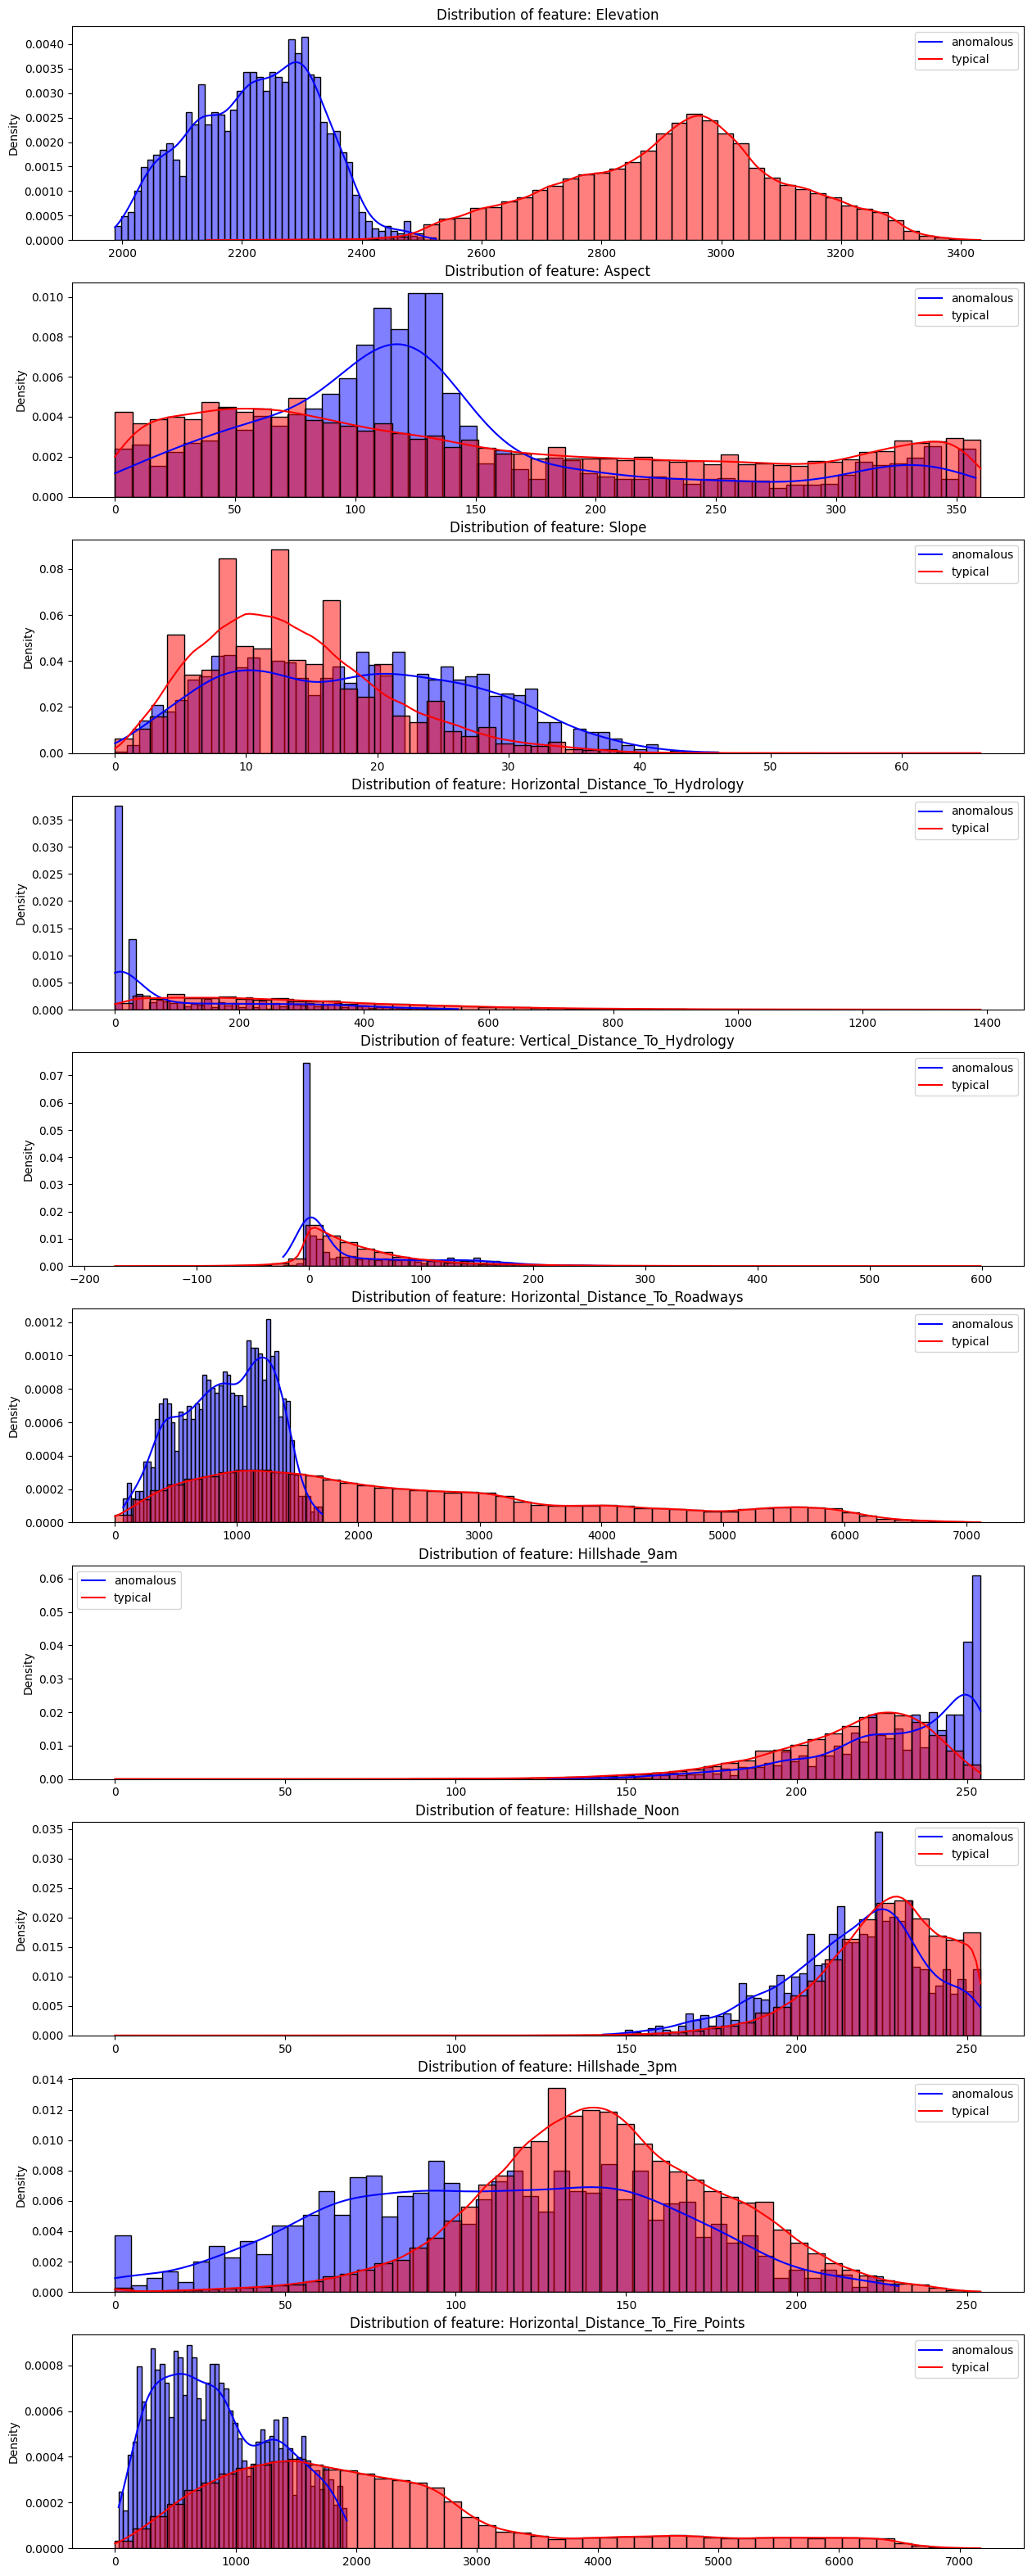

In [7]:
import matplotlib.gridspec as gridspec
features=[f for f in df.columns if not 'Anomaly' in f]
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    print(feat)
    ax = plt.subplot(gs[i])
    sns.histplot(X_train[feat][y_train==1], stat="density", kde=True, color="blue", bins=50)
    sns.histplot(X_train[feat][y_train==0], stat="density", kde=True, color="red", bins=50)
    ax.legend(['anomalous', 'typical'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

Explain how these graphs could provide meaningful information about anomaly detection using a gaussian model. **[0.5]**

By analyzing the graphs, the distribution can provide some meaningful information about anomaly detection using a gaussian model. By looking at each feature separately the distributions between anomalous and typical will let you know which feature will be hard in terms of analyzing anomalous and typical data. For example, the first feature [Elevation] has a distribution which clearly separates between anomalous and typical data which would be easier to analyze (This is why in question 5, the model that outputted the best results was using 1-feature (Elevation) which no anomaly-data points included). Other features such as [Horizontal distance to fire points] has a distribution between the classes which overlaps therefore they will be slightly harder to analyze. Finally, features such as Aspect has a distribution between classes that follows each other closely therefore they will be hard to analyze. Additionally, these graphs can be used to detect outliers as features that display larger movements compared to the distribution can be an indication of outlier data.

## **Part 2: Single feature model with one Gaussian distribution: [2.5 Marks]**
We'll start by making a prediction using **a single feature of our dataset at a time**.

**a. Fitting regardless of class:**
  1. Fit a single Gaussian distribution on a single feature of **the full training dataset** (both classes) using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``.
  2. Compute AUC (Area under the ROC Curve) based on ``sklearn.mixture.GaussianMixture.score_samples`` on both the full training set and validation set (including both classes).  
  3. Repeat the above steps for each of the features and present your findings in a table.
  4. Find the best 3 features to distinguish anomalous forests from non-anomalous forests based on the AUC of the validation set. **[0.2]**
  5. Make a prediction based on a model's scores: If the `score_samples` is lower than a threshold, we consider that forests as a fraud. Find an optimal threshold that maximizes the F1 Score of the validation set for each of those 3 features separately. (Do not check every possible value for threshold, come up with a faster way!) Compute F1 score using `sklearn.metrics.f1_score`. **[0.5]**
  6. Report the complexity of your method (Big O notation) for determining the optimal threshold.**[0.5]**

**b. Fitting based on class:**
 1. Pick 3 features that had the best AUC in Part 2a.
 2. Compute AUC and F1 score when you fit a Gaussian **only on non-anomalous forests** (instead of all the forests).
 3. Compare your results from parts 2a and 2b (AUC and F1 score) in a table. **[0.8]**
 4. Are these results different or similar? Why?**[0.5]**





In [8]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

Features = []
Train_AUC = []
Val_AUC = []

for feat in X_train.columns:

    gm = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0, ) # each component has its own general covariance matrix
    gm.fit(X_train[[feat]])
    c = gm.score_samples(X_train[[feat]])
    d = gm.score_samples(X_val[[feat]])

    # print ("AUC of Gaussian Mixture for training set is " , format(roc_auc_score(y_train, -1 * c)  , ".3f"), feat ) #to check the AUC and for the training set
    # print ("AUC of Gaussian Mixture for validation set is " ,format(roc_auc_score(y_val, -1 * d)  , ".3f"), feat ) #to check the AUC for the validation set
    # print("\n")

    train_auc = roc_auc_score(y_train, -1 * c)
    val_auc = roc_auc_score(y_val, -1 * d)

    Features.append(feat)
    Train_AUC.append(train_auc)
    Val_AUC.append(val_auc)

    Total_AUC = pd.DataFrame({'Features': Features, 'Train_AUC': Train_AUC, 'Val_AUC': Val_AUC})

print("The AUC for all features under the whole training set and validation set")
print(Total_AUC)
print("\n")
print("\n")
best_3_features = Total_AUC.sort_values(by='Val_AUC', ascending=False).head(3)
print("Best 3 Features based on the on the AUC of the validation set")
print(best_3_features)
print("\n")
print("\n")

features = []
best_thresholds = []
precisions = []
recalls = []
f1_scores = []

# Using the best 3 features based on validation AUC to calculate precision, recall, and F1 score
for feat in best_3_features['Features']:
    gm = GaussianMixture(n_components=1, covariance_type='full', random_state=0)
    gm.fit(X_train[[feat]])
    d = gm.score_samples(X_val[[feat]])

    best_f1 = 0
    best_threshold = 0
    #Another faster way is to use  (thresholds = np.linspace(min(d), max(d), 1000)) with 1000 being a large X to capture the best threshold value. This cut the run time by a substansal amount (~4 mins to ~19s). This method was enorsed by a TA on Piazza.
    #However, in order to keep the results accurate, this was not used even though the results were very close.

    unique_thresholds = np.unique(d) #This uses numpy unique function to not check for duplicates. As stated in the project, not to check every possible value for the threshold.
    #By not checking for duplicates this cut the run time from ~+1hrs to ~4min. Not checking for duplicates scores was stated as the meaning of coming up with a faster way by a TA on Piazza.

    for threshold in unique_thresholds:
        y_pred = (d <= threshold)
        f1 = f1_score(y_val, y_pred)

        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold

    precision = precision_score(y_val, (d <= best_threshold))
    recall = recall_score(y_val, (d <= best_threshold))

    features.append(feat)
    best_thresholds.append(f'{best_threshold:.3f}')
    precisions.append(f'{precision:.3f}')
    recalls.append(f'{recall:.3f}')
    f1_scores.append(f'{best_f1:.3f}')


optimal_thresholds = pd.DataFrame({'Feature': features, 'Best Threshold': best_thresholds, 'Precision': precisions, 'Recall': recalls, 'F1 Score': f1_scores})
print("Optimal threshold that maximizes the F1 Score of the validation set for 3 best features")
print(optimal_thresholds)




The AUC for all features under the whole training set and validation set
                             Features  Train_AUC   Val_AUC
0                           Elevation   0.999357  0.999345
1                              Aspect   0.378543  0.386010
2                               Slope   0.644247  0.648826
3    Horizontal_Distance_To_Hydrology   0.659053  0.659604
4      Vertical_Distance_To_Hydrology   0.650172  0.642457
5     Horizontal_Distance_To_Roadways   0.614681  0.608750
6                       Hillshade_9am   0.630971  0.629436
7                      Hillshade_Noon   0.535736  0.559227
8                       Hillshade_3pm   0.658451  0.660931
9  Horizontal_Distance_To_Fire_Points   0.672193  0.681883




Best 3 Features based on the on the AUC of the validation set
                             Features  Train_AUC   Val_AUC
0                           Elevation   0.999357  0.999345
9  Horizontal_Distance_To_Fire_Points   0.672193  0.681883
8                       Hillshade_3

Part 2 a) 6)
---
___
 The complexity of the method (Big O notation) for determining the optimal threshold is linearithmic O(n*log(n))
 ___

Part 2 b)
---

In [9]:
Features = []
Train_AUC = []
Val_AUC = []

#Only non-anomalous forests
non_anomalous_X_train = X_train[y_train == 0]

for feat in X_train.columns:
    gm = GaussianMixture(n_components=1, covariance_type='full', random_state=0)
    gm.fit(non_anomalous_X_train[[feat]])
    c = gm.score_samples(X_train[[feat]])
    d = gm.score_samples(X_val[[feat]])

    train_auc = roc_auc_score((y_train ==0), -1 * c)
    val_auc = roc_auc_score(y_val, -1 * d)

    Features.append(feat)
    Train_AUC.append(train_auc)
    Val_AUC.append(val_auc)

Total_AUC_2 = pd.DataFrame({'Features': Features, 'Train_AUC': Train_AUC, 'Val_AUC': Val_AUC})

print("The AUC for all features under the whole training set and validation set")
print(Total_AUC_2)
print("\n\n")

best_3_features_2 = Total_AUC_2.sort_values(by='Val_AUC', ascending=False).head(3)
print("Best 3 Features based on the AUC of the validation set")
print(best_3_features_2)
print("\n\n")

features = []
best_thresholds = []
precisions = []
recalls = []
f1_scores = []

# Using the best 3 features based on validation AUC to calculate precision, recall, and F1 score
for feat in best_3_features_2['Features']:
    gm = GaussianMixture(n_components=1, covariance_type='full', random_state=0)
    gm.fit(non_anomalous_X_train[[feat]])
    d = gm.score_samples(X_val[[feat]])

    best_f1 = 0
    best_threshold = 0

    unique_thresholds = np.unique(d)  # To avoid duplicates

    for threshold in unique_thresholds:
        y_pred = (d <= threshold)
        f1 = f1_score(y_val, y_pred)

        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold

    precision = precision_score(y_val, (d <= best_threshold))
    recall = recall_score(y_val, (d <= best_threshold))

    features.append(feat)
    best_thresholds.append(f'{best_threshold:.3f}')
    precisions.append(f'{precision:.3f}')
    recalls.append(f'{recall:.3f}')
    f1_scores.append(f'{best_f1:.3f}')

optimal_thresholds_2 = pd.DataFrame({'Feature': features, 'Best Threshold': best_thresholds, 'Precision': precisions, 'Recall': recalls, 'F1 Score': f1_scores})
print("Optimal threshold that maximizes the F1 Score of the validation set for 3 best features")
print(optimal_thresholds_2)


The AUC for all features under the whole training set and validation set
                             Features  Train_AUC   Val_AUC
0                           Elevation   0.000632  0.999359
1                              Aspect   0.621457  0.386010
2                               Slope   0.355753  0.648826
3    Horizontal_Distance_To_Hydrology   0.340387  0.660077
4      Vertical_Distance_To_Hydrology   0.349828  0.642457
5     Horizontal_Distance_To_Roadways   0.382484  0.611563
6                       Hillshade_9am   0.369029  0.629436
7                      Hillshade_Noon   0.464264  0.559227
8                       Hillshade_3pm   0.340807  0.661321
9  Horizontal_Distance_To_Fire_Points   0.325565  0.683989



Best 3 Features based on the AUC of the validation set
                             Features  Train_AUC   Val_AUC
0                           Elevation   0.000632  0.999359
9  Horizontal_Distance_To_Fire_Points   0.325565  0.683989
8                       Hillshade_3pm   0.3

In [10]:
#Both tables combined
Total_AUC_1_2 = pd.concat([Total_AUC, Total_AUC_2], axis=1)
best_3_features_1_2 = pd.concat([best_3_features, best_3_features_2], axis=1)
optimal_thresholds_1_2 = pd.concat([optimal_thresholds, optimal_thresholds_2], axis=1)


best_3_features_1_2 = pd.concat([best_3_features, best_3_features_2.drop(best_3_features_2.columns[0], axis=1)], axis=1)


print(Total_AUC_1_2)
print("\n")
print(best_3_features_1_2)
print("\n")
print(optimal_thresholds_1_2)





                             Features  Train_AUC   Val_AUC  \
0                           Elevation   0.999357  0.999345   
1                              Aspect   0.378543  0.386010   
2                               Slope   0.644247  0.648826   
3    Horizontal_Distance_To_Hydrology   0.659053  0.659604   
4      Vertical_Distance_To_Hydrology   0.650172  0.642457   
5     Horizontal_Distance_To_Roadways   0.614681  0.608750   
6                       Hillshade_9am   0.630971  0.629436   
7                      Hillshade_Noon   0.535736  0.559227   
8                       Hillshade_3pm   0.658451  0.660931   
9  Horizontal_Distance_To_Fire_Points   0.672193  0.681883   

                             Features  Train_AUC   Val_AUC  
0                           Elevation   0.000632  0.999359  
1                              Aspect   0.621457  0.386010  
2                               Slope   0.355753  0.648826  
3    Horizontal_Distance_To_Hydrology   0.340387  0.660077  
4      Verti

Part 2b) 4)
---
___
The results when considered both classes and only considering 1 class (non-anomalies) are very similar. This is due to the data being heavily unbalanced in that anomalies only make up 0.96% of the data therefore by removing them the overall results will stay the same unless the data points in the anomalies significantly affect the model's decision boundaries and in this case it did not.
___

## **Bonus Part: Using the Precision Recall Curve: [1 Mark]**
Repeat Part 2 using the PR-AUC (Area under the Precision Recall Curve) instead of the ROC-AUC (Area under the ROC curve). **[0.5]**

Are these results similar or different from the previous results (using the ROC-AUC)? Why? Comment on why using the PR-AUC might be helpful here. **[0.5]**

In [11]:
from sklearn.metrics import average_precision_score


Features = []
Train_PR_AUC = []
Val_PR_AUC = []

for feat in X_train.columns:

    gm = GaussianMixture(n_components=1, covariance_type='full', random_state=0)
    gm.fit(X_train[[feat]])
    c = gm.score_samples(X_train[[feat]])
    d = gm.score_samples(X_val[[feat]])

    train_pr_auc = average_precision_score(y_train, -1 * c)
    val_pr_auc = average_precision_score(y_val, -1 * d)

    Features.append(feat)
    Train_PR_AUC.append(train_pr_auc)
    Val_PR_AUC.append(val_pr_auc)

    Total_PR_AUC_3 = pd.DataFrame({'Features': Features, 'Train_PR_AUC': Train_PR_AUC, 'Val_PR_AUC': Val_PR_AUC})

print("The PR-AUC for all features under the whole training set and validation set")
print(Total_PR_AUC_3)
print("\n\n")

# Using the best 3 features based on validation AUC to calculate precision, recall, and F1 score

best_3_features_3 = Total_PR_AUC_3.sort_values(by='Val_PR_AUC', ascending=False).head(3)
print("Best 3 Features based on the PR-AUC of the validation set")
print(best_3_features_3)
print("\n\n")

features = []
best_thresholds = []
precisions = []
recalls = []
f1_scores = []

# Iterate over the top features based on validation PR-AUC to calculate precision, recall, and F1 score
for feat in best_3_features_3['Features']:
    gm = GaussianMixture(n_components=1, covariance_type='full', random_state=0)
    gm.fit(X_train[[feat]])
    d = gm.score_samples(X_val[[feat]])

    best_f1 = 0
    best_threshold = 0
    unique_thresholds = np.unique(d)

    for threshold in unique_thresholds:
        y_pred = (d <= threshold)
        f1 = f1_score(y_val, y_pred)

        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold

    precision = precision_score(y_val, (d <= best_threshold))
    recall = recall_score(y_val, (d <= best_threshold))

    features.append(feat)
    best_thresholds.append(f'{best_threshold:.3f}')
    precisions.append(f'{precision:.3f}')
    recalls.append(f'{recall:.3f}')
    f1_scores.append(f'{best_f1:.3f}')

optimal_thresholds_3 = pd.DataFrame({'Feature': features, 'Best Threshold': best_thresholds, 'Precision': precisions, 'Recall': recalls, 'F1 Score': f1_scores})
print("Optimal threshold that maximizes the F1 Score of the validation set for 3 best features")
print(optimal_thresholds_3)


The PR-AUC for all features under the whole training set and validation set
                             Features  Train_PR_AUC  Val_PR_AUC
0                           Elevation      0.929346    0.930836
1                              Aspect      0.007278    0.007285
2                               Slope      0.022407    0.023149
3    Horizontal_Distance_To_Hydrology      0.021764    0.021342
4      Vertical_Distance_To_Hydrology      0.015988    0.015687
5     Horizontal_Distance_To_Roadways      0.011206    0.010783
6                       Hillshade_9am      0.015992    0.015823
7                      Hillshade_Noon      0.013312    0.014140
8                       Hillshade_3pm      0.032320    0.035774
9  Horizontal_Distance_To_Fire_Points      0.014082    0.014165



Best 3 Features based on the PR-AUC of the validation set
        Features  Train_PR_AUC  Val_PR_AUC
0      Elevation      0.929346    0.930836
8  Hillshade_3pm      0.032320    0.035774
2          Slope      0.022407

Part 3 - 2b)
---

In [12]:
from sklearn.metrics import average_precision_score

Features = []
Train_PR_AUC_2 = []
Val_PR_AUC_2 = []

non_anomalous_X_train = X_train[y_train == 0]

for feat in X_train.columns:
    gm = GaussianMixture(n_components=1, covariance_type='full', random_state=0)
    gm.fit(non_anomalous_X_train[[feat]])
    c = gm.score_samples(X_train[[feat]])
    d = gm.score_samples(X_val[[feat]])

    train_pr_auc = average_precision_score(y_train, -1 * c)
    val_pr_auc = average_precision_score(y_val, -1 * d)

    Features.append(feat)
    Train_PR_AUC_2.append(train_pr_auc)
    Val_PR_AUC_2.append(val_pr_auc)

Total_PR_AUC_4 = pd.DataFrame({'Features': Features, 'Train_PR_AUC_2': Train_PR_AUC_2, 'Val_PR_AUC_2': Val_PR_AUC_2})

print("The AUC for all features under the whole training set and validation set")
print(Total_PR_AUC_4)
print("\n\n")

best_3_features_4 = Total_PR_AUC_4.sort_values(by='Val_PR_AUC_2', ascending=False).head(3)
print("Best 3 Features based on the AUC of the validation set")
print(best_3_features_4)
print("\n\n")

features = []
best_thresholds = []
precisions = []
recalls = []
f1_scores = []

# Iterate over the top features based on validation AUC to calculate precision, recall, and F1 score
for feat in best_3_features_4['Features']:
    gm = GaussianMixture(n_components=1, covariance_type='full', random_state=0)
    gm.fit(non_anomalous_X_train[[feat]])
    d = gm.score_samples(X_val[[feat]])

    best_f1 = 0
    best_threshold = 0

    unique_thresholds = np.unique(d)  #To avoid duplicates

    for threshold in unique_thresholds:
        y_pred = (d <= threshold)
        f1 = f1_score(y_val, y_pred)

        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold

    precision = precision_score(y_val, (d <= best_threshold))
    recall = recall_score(y_val, (d <= best_threshold))

    features.append(feat)
    best_thresholds.append(f'{best_threshold:.3f}')
    precisions.append(f'{precision:.3f}')
    recalls.append(f'{recall:.3f}')
    f1_scores.append(f'{best_f1:.3f}')

optimal_thresholds_4 = pd.DataFrame({'Feature': features, 'Best Threshold': best_thresholds, 'Precision': precisions, 'Recall': recalls, 'F1 Score': f1_scores})
print("Optimal threshold that maximizes the F1 Score of the validation set for 3 best features")
print(optimal_thresholds_4)


The AUC for all features under the whole training set and validation set
                             Features  Train_PR_AUC_2  Val_PR_AUC_2
0                           Elevation        0.929702      0.931142
1                              Aspect        0.007278      0.007285
2                               Slope        0.022407      0.023149
3    Horizontal_Distance_To_Hydrology        0.021872      0.021439
4      Vertical_Distance_To_Hydrology        0.015988      0.015687
5     Horizontal_Distance_To_Roadways        0.011288      0.010860
6                       Hillshade_9am        0.015992      0.015823
7                      Hillshade_Noon        0.013312      0.014140
8                       Hillshade_3pm        0.032759      0.036190
9  Horizontal_Distance_To_Fire_Points        0.014168      0.014249



Best 3 Features based on the AUC of the validation set
        Features  Train_PR_AUC_2  Val_PR_AUC_2
0      Elevation        0.929702      0.931142
8  Hillshade_3pm        0.0

In [13]:
#To combine all tables
Total_AUC_2_2 = pd.concat([Total_PR_AUC_3, Total_PR_AUC_4], axis=1)
best_3_features_2_2 = pd.concat([best_3_features_3, best_3_features_4], axis=1)
optimal_thresholds_2_2 = pd.concat([optimal_thresholds_3, optimal_thresholds_4], axis=1)


print(Total_AUC_2_2)
print("\n")
print(best_3_features_2_2)
print("\n")
print(optimal_thresholds_2_2)


                             Features  Train_PR_AUC  Val_PR_AUC  \
0                           Elevation      0.929346    0.930836   
1                              Aspect      0.007278    0.007285   
2                               Slope      0.022407    0.023149   
3    Horizontal_Distance_To_Hydrology      0.021764    0.021342   
4      Vertical_Distance_To_Hydrology      0.015988    0.015687   
5     Horizontal_Distance_To_Roadways      0.011206    0.010783   
6                       Hillshade_9am      0.015992    0.015823   
7                      Hillshade_Noon      0.013312    0.014140   
8                       Hillshade_3pm      0.032320    0.035774   
9  Horizontal_Distance_To_Fire_Points      0.014082    0.014165   

                             Features  Train_PR_AUC_2  Val_PR_AUC_2  
0                           Elevation        0.929702      0.931142  
1                              Aspect        0.007278      0.007285  
2                               Slope        0.02240

The results obtained using PR-AUC (Area under the Precision Recall Curve) instead of the ROC-AUC (Area under the ROC curve) are different. The top 3 features using the ROC-AUC are Elevation, Horizontal_Distance_To_Fire_Points, and Hillshade_3pm, while using the PR-AUC Elevation, Slope, and Hillshade_3pm. The values obtained using PR-AUC were overall worse compared to ROC-AUC. Since PR-AUC optimizes the area uner the percision / recall curve which is senstive to the Pr, than using ROC-AUC. Since there are very few anomalies, this can lead to them being hard to detect which could worsen the results.
___
Using PR-AUC should be helpful in this dataset because the data is heavily imbalanced in that the anomalies are the minority class. This would be the ideal case to use PR-AUC over ROC-AUC which evaluates the performace overall since the balance between the class are very unbalanced.

## **Part 3: Multiple feature model with one Gaussian distribution: [1 Marks]**
This part is similar to Part 2, but we will pick multiple features and **visually** set the number of components.

  a. 2D plot:
 1. Pick two features (say, f1 and f2).
 2. Scatter plot (plt.scatter) those features on a figure (f1 on the x-axis and f2 on the y-axis).
 3. Color the data points based on their class (non-anomalous blue and anomalous red).
 4. Based on your plots, decide how many Gaussian components (``n_components``) you need to fit the data (focus on valid forests). Explain.  **[0.25]**
 5. Fit your Gaussian model on all the data points.
 6. Compute AUC on both training and validation sets
 7. Pick 3 new pairs of features and repeat steps 2 to 6. **[0.25]**
 8. For each pair, find a threshold to maximize your validation set F1 Score.**[0.25]**
 9. For each pair, plot a figure similar to step 3 and put a circle around outliers based on your threshold (use the code of the similar figure in the tutorial) **[0.25]**





___
First set
---

The AUC for the first pair of features under the whole training set and validation set
              Features  Train_AUC   Val_AUC
0  (Elevation, Aspect)   0.996767  0.997306


Optimal threshold that maximizes the F1 Score of the validation set
               Feature Best Threshold Precision Recall F1 Score
0  (Elevation, Aspect)        -16.120     0.775  0.837    0.805


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


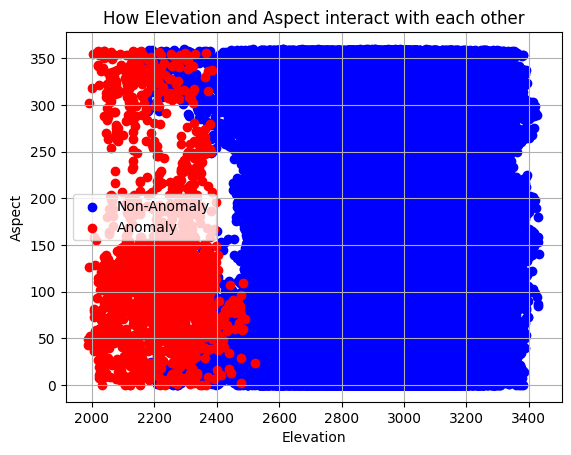

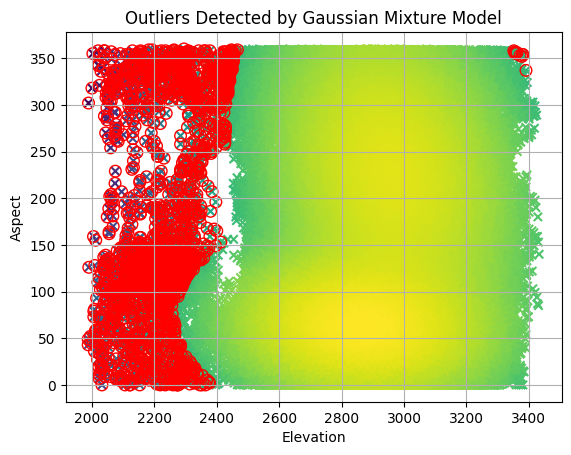

In [14]:
#selecting specific features
Training_Data_X_train = pd.DataFrame(X_train, columns = ['Elevation', 'Aspect']) #set the X_train to dataframe
Training_Data_y_train = pd.DataFrame(y_train, columns = ['Anomaly']) #set the y_train to dataframe

X_y_training_set = pd.concat([Training_Data_X_train, Training_Data_y_train], axis = 1)

non_anomaly = X_y_training_set[X_y_training_set['Anomaly'] == 0]
anomaly = X_y_training_set[X_y_training_set['Anomaly'] == 1]

Features = 'Elevation', 'Aspect'
Train_AUC = []
Val_AUC = []


gm = GaussianMixture(n_components = 2, covariance_type = 'full', random_state=0, ) # each component has its own general covariance matrix
gm.fit(X_train[['Elevation', 'Aspect']])
c = gm.score_samples(X_train[['Elevation', 'Aspect']])
d = gm.score_samples(X_val[['Elevation', 'Aspect']])

train_auc = roc_auc_score(y_train, -1 * c)
val_auc = roc_auc_score(y_val, -1 * d)

Train_AUC.append(train_auc)
Val_AUC.append(val_auc)

Total_AUC_4 = pd.DataFrame({'Features': [Features], 'Train_AUC': Train_AUC, 'Val_AUC': Val_AUC})

print("The AUC for the first pair of features under the whole training set and validation set")
print(Total_AUC_4)
print("\n")

best_f1 = 0
best_threshold = 0

#unique_thresholds = np.unique(d) #This uses numpy unique function to not check for duplicates. As stated in the project, not to check every possible value for the threshold.

thresholds = np.linspace(min(d), max(d), 1000) #this was used over finding each threshold as run time was exceeding ~20min

best_thresholds = []
precisions = []
recalls = []
f1_scores = []

for threshold in thresholds:
    y_pred = (d <= threshold)
    f1 = f1_score(y_val, y_pred)

    if f1 > best_f1:
       best_f1 = f1
       best_threshold = threshold

precision = precision_score(y_val, (d <= best_threshold))
recall = recall_score(y_val, (d <= best_threshold))

best_thresholds.append(f'{best_threshold:.3f}')
precisions.append(f'{precision:.3f}')
recalls.append(f'{recall:.3f}')
f1_scores.append(f'{best_f1:.3f}')

optimal_thresholds = pd.DataFrame({'Feature': [Features], 'Best Threshold': best_thresholds, 'Precision': precisions, 'Recall': recalls, 'F1 Score': f1_scores})
print("Optimal threshold that maximizes the F1 Score of the validation set")
print(optimal_thresholds)


gm = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
gm.fit(X_train[['Elevation', 'Aspect']])

d = gm.score_samples(X_train[['Elevation', 'Aspect']])


plt.scatter(non_anomaly['Elevation'], non_anomaly['Aspect'], color='blue', label='Non-Anomaly')
plt.scatter(anomaly['Elevation'], anomaly['Aspect'], color='red', label='Anomaly')
plt.title('How Elevation and Aspect interact with each other')
plt.xlabel('Elevation')
plt.ylabel('Aspect')
plt.legend()
plt.grid(True)
plt.show()



plt.scatter(X_train['Elevation'], X_train['Aspect'], c=d, cmap='viridis', marker='x')


threshold = best_threshold

#Outliers based on the threshold
outliers = np.nonzero(d < threshold)[0]
plt.scatter(X_train.iloc[outliers]['Elevation'], X_train.iloc[outliers]['Aspect'], marker="o", facecolor="none", edgecolor="r", s=70)

plt.xlabel('Elevation')
plt.ylabel('Aspect')
plt.title('Outliers Detected by Gaussian Mixture Model')

# Show plot
plt.grid(True)
plt.show()



Part 3 a) 4)
---
___
Based on the plot above, there seems to be 2 distinct clusters with clear speration(I plotted non-anomaly and anaomly seperatly and majoiry do not overlap). Therefore, the number of Gaussian components (n_components) that would be approperate would be 2.
___

___
Second set
---

The AUC for the first pair of features under the whole training set and validation set
             Features  Train_AUC   Val_AUC
0  (Elevation, Slope)   0.995738  0.996232


Optimal threshold that maximizes the F1 Score of the validation set for 3 best features
              Feature Best Threshold Precision Recall F1 Score
0  (Elevation, Slope)        -13.822     0.655  0.725    0.689


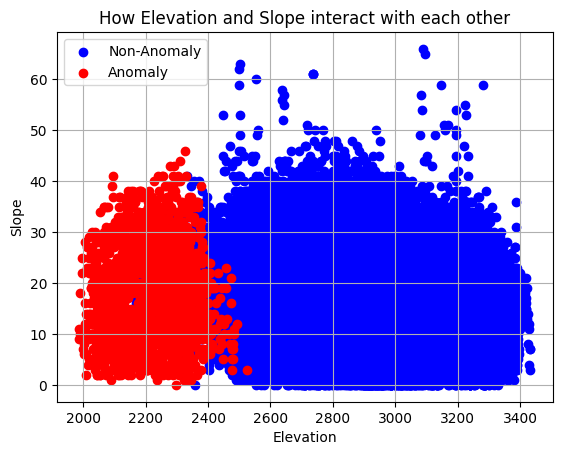

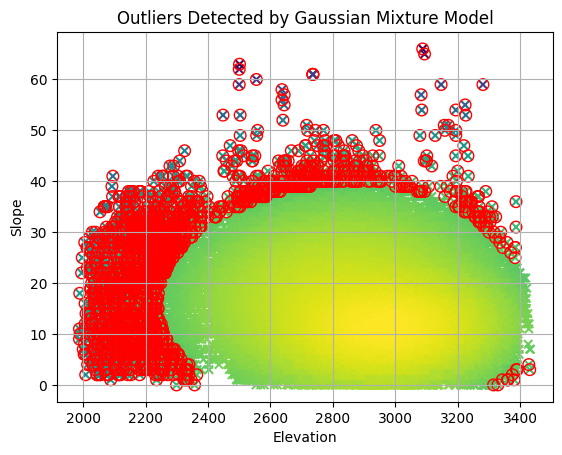

In [15]:
Training_Data_X_train = pd.DataFrame(X_train, columns = ['Elevation', 'Slope']) #set the X_train to dataframe
Training_Data_y_train = pd.DataFrame(y_train, columns = ['Anomaly']) #set the y_train to dataframe

X_y_training_set = pd.concat([Training_Data_X_train, Training_Data_y_train], axis = 1)

non_anomaly = X_y_training_set[X_y_training_set['Anomaly'] == 0]
anomaly = X_y_training_set[X_y_training_set['Anomaly'] == 1]


Features = 'Elevation', 'Slope'
Train_AUC = []
Val_AUC = []


gm = GaussianMixture(n_components = 2, covariance_type = 'full', random_state=0, ) # each component has its own general covariance matrix
gm.fit(X_train[['Elevation', 'Slope']])
c = gm.score_samples(X_train[['Elevation', 'Slope']])
d = gm.score_samples(X_val[['Elevation', 'Slope']])

train_auc = roc_auc_score(y_train, -1 * c)
val_auc = roc_auc_score(y_val, -1 * d)


Train_AUC.append(train_auc)
Val_AUC.append(val_auc)

Total_AUC_4 = pd.DataFrame({'Features': [Features], 'Train_AUC': Train_AUC, 'Val_AUC': Val_AUC})

print("The AUC for the first pair of features under the whole training set and validation set")
print(Total_AUC_4)
print("\n")

best_f1 = 0
best_threshold = 0

#unique_thresholds = np.unique(d) #This uses numpy unique function to not check for duplicates. As stated in the project, not to check every possible value for the threshold.

thresholds = np.linspace(min(d), max(d), 1000) #this was used over finding each threshold as run time was exceeding ~20min

best_thresholds = []
precisions = []
recalls = []
f1_scores = []

for threshold in thresholds:
    y_pred = (d <= threshold)
    f1 = f1_score(y_val, y_pred)

    if f1 > best_f1:
       best_f1 = f1
       best_threshold = threshold

precision = precision_score(y_val, (d <= best_threshold))
recall = recall_score(y_val, (d <= best_threshold))

best_thresholds.append(f'{best_threshold:.3f}')
precisions.append(f'{precision:.3f}')
recalls.append(f'{recall:.3f}')
f1_scores.append(f'{best_f1:.3f}')

optimal_thresholds = pd.DataFrame({'Feature': [Features], 'Best Threshold': best_thresholds, 'Precision': precisions, 'Recall': recalls, 'F1 Score': f1_scores})
print("Optimal threshold that maximizes the F1 Score of the validation set for 3 best features")
print(optimal_thresholds)

gm = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
gm.fit(X_train[['Elevation', 'Slope']])


d = gm.score_samples(X_train[['Elevation', 'Slope']])


plt.scatter(non_anomaly['Elevation'], non_anomaly['Slope'], color='blue', label='Non-Anomaly')
plt.scatter(anomaly['Elevation'], anomaly['Slope'], color='red', label='Anomaly')
plt.title('How Elevation and Slope interact with each other')
plt.xlabel('Elevation')
plt.ylabel('Slope')
plt.legend()
plt.grid(True)
plt.show()



plt.scatter(X_train['Elevation'], X_train['Slope'], c=d, cmap='viridis', marker='x')


threshold = best_threshold

# Outliers based on the threshold
outliers = np.nonzero(d < threshold)[0]
plt.scatter(X_train.iloc[outliers]['Elevation'], X_train.iloc[outliers]['Slope'], marker="o", facecolor="none", edgecolor="r", s=70)

# Additional plot settings

plt.xlabel('Elevation')
plt.ylabel('Slope')
plt.title('Outliers Detected by Gaussian Mixture Model')

# Show plot
plt.grid(True)
plt.show()


Part 3 a) 4)
---
___
Based on the plot above, there seems to be 2 distinct clusters with clear speration(I plotted non-anomaly and anaomly seperatly and majoiry do not overlap). Therefore, the number of Gaussian components (n_components) that would be approperate would be 2.
___

___
Third Set
---

The AUC for the first pair of features under the whole training set and validation set
                                        Features  Train_AUC   Val_AUC
0  (Elevation, Horizontal_Distance_To_Hydrology)   0.993728  0.993026


Optimal threshold that maximizes the F1 Score of the validation set for 3 best features
                                         Feature Best Threshold Precision  \
0  (Elevation, Horizontal_Distance_To_Hydrology)        -17.178     0.477   

  Recall F1 Score  
0  0.710    0.571  


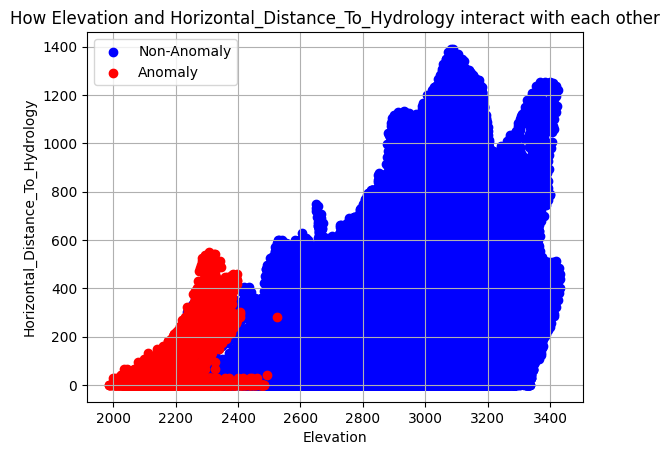

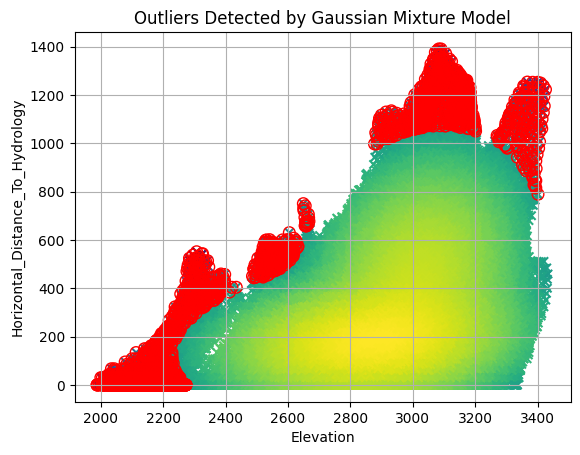

In [16]:
Training_Data_X_train = pd.DataFrame(X_train, columns = ['Elevation', 'Horizontal_Distance_To_Hydrology']) #set the X_train to dataframe
Training_Data_y_train = pd.DataFrame(y_train, columns = ['Anomaly']) #set the y_train to dataframe

X_y_training_set = pd.concat([Training_Data_X_train, Training_Data_y_train], axis = 1)

non_anomaly = X_y_training_set[X_y_training_set['Anomaly'] == 0]
anomaly = X_y_training_set[X_y_training_set['Anomaly'] == 1]

Features = 'Elevation', 'Horizontal_Distance_To_Hydrology'
Train_AUC = []
Val_AUC = []


gm = GaussianMixture(n_components = 2, covariance_type = 'full', random_state=0, ) # each component has its own general covariance matrix
gm.fit(X_train[['Elevation', 'Horizontal_Distance_To_Hydrology']])
c = gm.score_samples(X_train[['Elevation', 'Horizontal_Distance_To_Hydrology']])
d = gm.score_samples(X_val[['Elevation', 'Horizontal_Distance_To_Hydrology']])

train_auc = roc_auc_score(y_train, -1 * c)
val_auc = roc_auc_score(y_val, -1 * d)

Train_AUC.append(train_auc)
Val_AUC.append(val_auc)

Total_AUC_4 = pd.DataFrame({'Features': [Features], 'Train_AUC': Train_AUC, 'Val_AUC': Val_AUC})

print("The AUC for the first pair of features under the whole training set and validation set")
print(Total_AUC_4)
print("\n")

best_f1 = 0
best_threshold = 0

#unique_thresholds = np.unique(d) #This uses numpy unique function to not check for duplicates. As stated in the project, not to check every possible value for the threshold.

thresholds = np.linspace(min(d), max(d), 1000)

best_thresholds = []
precisions = []
recalls = []
f1_scores = []


for threshold in thresholds:
    y_pred = (d <= threshold)
    f1 = f1_score(y_val, y_pred)

    if f1 > best_f1:
       best_f1 = f1
       best_threshold = threshold

precision = precision_score(y_val, (d <= best_threshold))
recall = recall_score(y_val, (d <= best_threshold))

best_thresholds.append(f'{best_threshold:.3f}')
precisions.append(f'{precision:.3f}')
recalls.append(f'{recall:.3f}')
f1_scores.append(f'{best_f1:.3f}')

optimal_thresholds = pd.DataFrame({'Feature': [Features], 'Best Threshold': best_thresholds, 'Precision': precisions, 'Recall': recalls, 'F1 Score': f1_scores})
print("Optimal threshold that maximizes the F1 Score of the validation set for 3 best features")
print(optimal_thresholds)

gm = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
gm.fit(X_train[['Elevation', 'Horizontal_Distance_To_Hydrology']])

d = gm.score_samples(X_train[['Elevation', 'Horizontal_Distance_To_Hydrology']])


plt.scatter(non_anomaly['Elevation'], non_anomaly['Horizontal_Distance_To_Hydrology'], color='blue', label='Non-Anomaly')
plt.scatter(anomaly['Elevation'], anomaly['Horizontal_Distance_To_Hydrology'], color='red', label='Anomaly')
plt.title('How Elevation and Horizontal_Distance_To_Hydrology interact with each other')
plt.xlabel('Elevation')
plt.ylabel('Horizontal_Distance_To_Hydrology')
plt.legend()
plt.grid(True)
plt.show()



plt.scatter(X_train['Elevation'], X_train['Horizontal_Distance_To_Hydrology'], c=d, cmap='viridis', marker='x')

threshold = best_threshold

# Outliers based on the threshold
outliers = np.nonzero(d < threshold)[0]
plt.scatter(X_train.iloc[outliers]['Elevation'], X_train.iloc[outliers]['Horizontal_Distance_To_Hydrology'], marker="o", facecolor="none", edgecolor="r", s=70)

plt.xlabel('Elevation')
plt.ylabel('Horizontal_Distance_To_Hydrology')
plt.title('Outliers Detected by Gaussian Mixture Model')

# Show plot
plt.grid(True)
plt.show()


Part 3 a) 4)
---
___
Based on the plot above, there seems to be 2 distinct clusters with clear speration(I plotted non-anomaly and anaomly seperatly and majoiry do not overlap). Therefore, the number of Gaussian components (n_components) that would be approperate would be 2.
___

___
Fourth Set
---

The AUC for the first pair of features under the whole training set and validation set
                                          Features  Train_AUC   Val_AUC
0  (Elevation, Horizontal_Distance_To_Fire_Points)   0.994894  0.995069


Optimal threshold that maximizes the F1 Score of the validation set for 3 best features
                                           Feature Best Threshold Precision  \
0  (Elevation, Horizontal_Distance_To_Fire_Points)        -19.332     0.719   

  Recall F1 Score  
0  0.639    0.676  


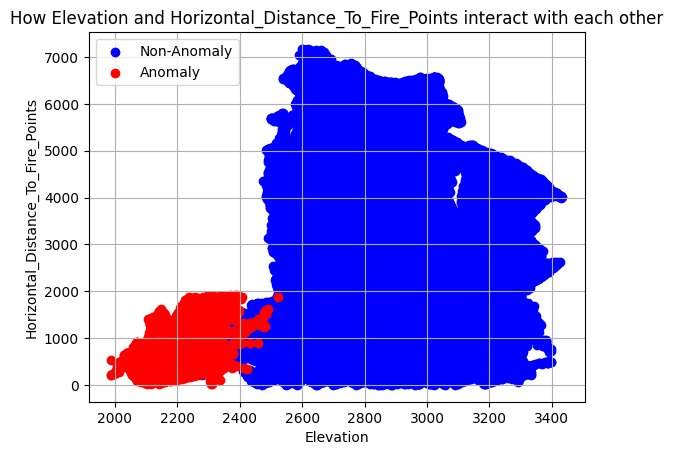

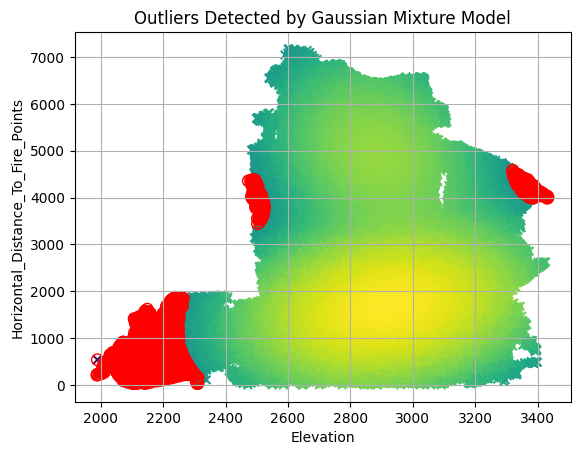

In [17]:
Training_Data_X_train = pd.DataFrame(X_train, columns = ['Elevation', 'Horizontal_Distance_To_Fire_Points']) #set the X_train to dataframe
Training_Data_y_train = pd.DataFrame(y_train, columns = ['Anomaly']) #set the y_train to dataframe

X_y_training_set = pd.concat([Training_Data_X_train, Training_Data_y_train], axis = 1)

non_anomaly = X_y_training_set[X_y_training_set['Anomaly'] == 0]
anomaly = X_y_training_set[X_y_training_set['Anomaly'] == 1]


Features = 'Elevation', 'Horizontal_Distance_To_Fire_Points'
Train_AUC = []
Val_AUC = []


gm = GaussianMixture(n_components = 2, covariance_type = 'full', random_state=0, ) # each component has its own general covariance matrix
gm.fit(X_train[['Elevation', 'Horizontal_Distance_To_Fire_Points']])
c = gm.score_samples(X_train[['Elevation', 'Horizontal_Distance_To_Fire_Points']])
d = gm.score_samples(X_val[['Elevation', 'Horizontal_Distance_To_Fire_Points']])

train_auc = roc_auc_score(y_train, -1 * c)
val_auc = roc_auc_score(y_val, -1 * d)

Train_AUC.append(train_auc)
Val_AUC.append(val_auc)

Total_AUC_4 = pd.DataFrame({'Features': [Features], 'Train_AUC': Train_AUC, 'Val_AUC': Val_AUC})

print("The AUC for the first pair of features under the whole training set and validation set")
print(Total_AUC_4)
print("\n")

best_f1 = 0
best_threshold = 0

#unique_thresholds = np.unique(d) #This uses numpy unique function to not check for duplicates. As stated in the project, not to check every possible value for the threshold.

thresholds = np.linspace(min(d), max(d), 1000)#this was used over finding each threshold as run time was exceeding ~20min

best_thresholds = []
precisions = []
recalls = []
f1_scores = []

for threshold in thresholds:
    y_pred = (d <= threshold)
    f1 = f1_score(y_val, y_pred)

    if f1 > best_f1:
       best_f1 = f1
       best_threshold = threshold

precision = precision_score(y_val, (d <= best_threshold))
recall = recall_score(y_val, (d <= best_threshold))

best_thresholds.append(f'{best_threshold:.3f}')
precisions.append(f'{precision:.3f}')
recalls.append(f'{recall:.3f}')
f1_scores.append(f'{best_f1:.3f}')

optimal_thresholds = pd.DataFrame({'Feature': [Features], 'Best Threshold': best_thresholds, 'Precision': precisions, 'Recall': recalls, 'F1 Score': f1_scores})
print("Optimal threshold that maximizes the F1 Score of the validation set for 3 best features")
print(optimal_thresholds)

gm = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
gm.fit(X_train[['Elevation', 'Horizontal_Distance_To_Fire_Points']])

d = gm.score_samples(X_train[['Elevation', 'Horizontal_Distance_To_Fire_Points']])


plt.scatter(non_anomaly['Elevation'], non_anomaly['Horizontal_Distance_To_Fire_Points'], color='blue', label='Non-Anomaly')
plt.scatter(anomaly['Elevation'], anomaly['Horizontal_Distance_To_Fire_Points'], color='red', label='Anomaly')
plt.title('How Elevation and Horizontal_Distance_To_Fire_Points interact with each other')
plt.xlabel('Elevation')
plt.ylabel('Horizontal_Distance_To_Fire_Points')
plt.legend()
plt.grid(True)
plt.show()



plt.scatter(X_train['Elevation'], X_train['Horizontal_Distance_To_Fire_Points'], c=d, cmap='viridis', marker='x')

threshold = best_threshold

#Outliers based on the threshold
outliers = np.nonzero(d < threshold)[0]
plt.scatter(X_train.iloc[outliers]['Elevation'], X_train.iloc[outliers]['Horizontal_Distance_To_Fire_Points'], marker="o", facecolor="none", edgecolor="r", s=70)

plt.xlabel('Elevation')
plt.ylabel('Horizontal_Distance_To_Fire_Points')
plt.title('Outliers Detected by Gaussian Mixture Model')

# Show plot
plt.grid(True)
plt.show()


Part 3 a) 4)
---
___
Based on the plot above, there seems to be 2 distinct clusters with clear speration(I plotted non-anomaly and anaomly seperatly and majoiry do not overlap). Therefore, the number of Gaussian components (n_components) that would be approperate would be 2.
___

## **Part 4: Single feature model with two Gaussian distributions. [2 Marks]**
Now we will use two different distributions for anomalous and non-anomalous forests.
  1.  Fit a Gaussian distribution ($G_1$) on a feature of **non-anomalous forests** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.25]**
  2. Fit another Gaussian distribution ($G_2$) on the same feature but for **anomalous forests** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.25]**
  3. Compute the score samples ($S$) for both $G_1$ and $G_2$ on the **validation set** to get $S_1$ and $S_2$, respectively. **[0.25]**
  4. Find an optimal $c$ (a real number) that maximizes validation set F1 Score for a model such that if $S_1 < c \times S_2$, the forest is classified as an anomaly. For example, if $c=1$ we could say that if $S_2$ is greater than $S_1$, ($S_1$<$S_2$) then the forest is an anomaly (the forest belongs to the $G_2$ distribution which represents anomalous forests). For start consider $c$ in $[0,10]$ with steps of 0.1, you can change this window in your experiments if needed. **[0.25]**
  5. Repeat the steps above for all the features. What is the best F1 Score that you get for training and validation? Which feature and what c? **[1]**

In [18]:

#non-anomalous and anomalous
non_anomalous = X_train[y_train == 0]
Anomalous = X_train[y_train == 1]


F_results = []

# Loop through each feature
for feature in X_train.columns:
    print(f"Feature: {feature}")

    #(G1)
    G_non_anomalous = GaussianMixture(n_components=1, covariance_type='full', random_state=0)
    G_non_anomalous.fit(non_anomalous[[feature]])

    #(G2)
    G_anomalous = GaussianMixture(n_components=1, covariance_type='full', random_state=0)
    G_anomalous.fit(Anomalous[[feature]])

    S1 = G_non_anomalous.score_samples(X_val[[feature]])
    S2 = G_anomalous.score_samples(X_val[[feature]])

    print(f"S1 scores (non-anomalous) for {feature}:", S1)

    print("\n")
    print(f"S2 scores (anomalous) for {feature}:", S2)
    print("\n")

    # Initialize variables
    best_f1 = 0
    best_c = 0

    #Range of c values to test
    c_values = np.arange(0, 10.1, 0.1)

    # Loop over possible values of c
    for c in c_values:
        #Anomaly if S1 < c * S2
        y_pred = (S1 < c * S2).astype(int)

        # Calculate F1 score
        f1 = f1_score(y_val, y_pred)

        # Update best F1 score and best c
        if f1 > best_f1:
            best_f1 = f1
            best_c = c

    # Print the optimal c and for F1 score
    print(f'Optimal c for {feature}: {best_c}')
    print("\n")
    print(f'Best F1 Score for {feature}: {best_f1}')
    print("\n")
    print('-' * 50)
    # Store the F_results
    F_results.append({'Feature': feature, 'Optimal c': best_c, 'Best F1 Score': best_f1})

# Print results in a table
print("\n")
F_results_df = pd.DataFrame(F_results)
print(F_results_df)


Feature: Elevation
S1 scores (non-anomalous) for Elevation: [-6.43396425 -6.25442674 -6.16225591 ... -6.38012493 -6.25197646
 -6.16315729]


S2 scores (anomalous) for Elevation: [-38.80824408 -23.23934982 -26.56409488 ... -37.70700062 -23.29724555
 -26.50109079]


Optimal c for Elevation: 1.6


Best F1 Score for Elevation: 0.8958333333333334


--------------------------------------------------
Feature: Aspect
S1 scores (non-anomalous) for Aspect: [-5.60371791 -6.35112019 -5.59886938 ... -5.60731587 -5.59941566
 -5.63446625]


S2 scores (anomalous) for Aspect: [-5.43134549 -6.25940699 -5.39337938 ... -5.3784363  -5.38954869
 -5.52130471]


Optimal c for Aspect: 1.0


Best F1 Score for Aspect: 0.02155848489904889


--------------------------------------------------
Feature: Slope
S1 scores (non-anomalous) for Slope: [-2.88033155 -3.18377255 -2.88033155 ... -2.94199321 -3.78481377
 -2.87935808]


S2 scores (anomalous) for Slope: [-3.32293169 -3.78019653 -3.32293169 ... -3.47135209 -4.3529

## **Part 5: Multivariate and Mixture of Gaussians Distribution [4 Marks]**
We now want to build an outlier detection model that performs well in terms of F1 score. To design your model, you can benefit from:

*   No restrictions on the number of features - use as few or as many as you want! (multivariate).
*   To fit your model, you can take advantage of the Gaussian mixture model, where you can set the number of components [help](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html).
*   You can choose to fit your Gaussians on non-anomalous forests or to both classes.


It is up to you how to design your model. Try at least 10 different models and report the AUC for both training and validation sets (if applicable) and the best F1 score for both training and validation sets for each model. What kind of model works better? How many features are best (and which ones)? How many Gaussians? How many components? Summarize your findings with tables or plots. **[4]**


**HINT !**

You might want to try a two-gaussian model, multiple features, a single component for the valid forest, and multiple components for anomalous ones! Why does it make sense to have multiple components for anomalous forests?

Model 1 - All Features, n = 1, all classes
---

In [19]:

feat = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm']
Train_AUC = []
Val_AUC = []

best_thresholds_train = []
best_thresholds_val = []
precisions_train = []
precisions_val = []
recalls_train = []
recalls_val = []
f1_train = []
f1_val = []

gm = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0, ) # each component has its own general covariance matrix
gm.fit(X_train[feat])
c = gm.score_samples(X_train[feat])
d = gm.score_samples(X_val[feat])

train_auc = roc_auc_score(y_train, -1 * c)
val_auc = roc_auc_score(y_val, -1 * d)

Train_AUC.append(train_auc)
Val_AUC.append(val_auc)

Total_AUC = pd.DataFrame({'Features': [feat], 'Train_AUC': Train_AUC, 'Val_AUC': Val_AUC})

print("The AUC for all features under the whole training set and validation set")
print(Total_AUC)
print("\n")
print("\n")


# Finding best threshold for training set
best_f1_train = 0
best_threshold_train = 0
thresholds_1 = np.linspace(min(c), max(c), 100)
for threshold in thresholds_1:
    y_pred_train = (c <= threshold)
    f1_train = f1_score(y_train, y_pred_train)

    if f1_train > best_f1_train:
       best_f1_train = f1_train
       best_threshold_train = threshold

precision_train = precision_score(y_train, (c <= best_threshold_train))
recall_train = recall_score(y_train, (c <= best_threshold_train))

# Finding best threshold for validation set
best_f1_val = 0
best_threshold_val = 0
thresholds = np.linspace(min(d), max(d), 100)

for threshold in thresholds:
    y_pred_val = (d <= threshold)
    f1_val = f1_score(y_val, y_pred_val)

    if f1_val > best_f1_val:
      best_f1_val = f1_val
      best_threshold_val = threshold

#precision and recall using the best thresholds

precision_val = precision_score(y_val, (d <= best_threshold_val))
recall_val = recall_score(y_val, (d <= best_threshold_val))

best_thresholds_train = best_threshold_train
best_thresholds_val = best_threshold_val
precisions_train = precision_train
precisions_val = precision_val
recalls_train = recall_train
recalls_val = recall_val
f1_train = best_f1_train
f1_val = best_f1_val
num_features = len(feat)

optimal_thresholds_11 = pd.DataFrame({'Num_Features': num_features,'Feature': [feat], 'Auc for Train': Train_AUC, 'AUC for Val': Val_AUC ,'Best Threshold training set': best_threshold_train, 'Precision for train': precision_train, 'Recall for train': recall_train, 'F1 Score for train': f1_train,'Best Threshold val': best_threshold_val, 'Precision for val': precision_val, 'Recall for val': recall_val, 'F1 Score for val': f1_val})
print("Optimal threshold that maximizes the F1 Score of the validation set for 3 best features")
print(optimal_thresholds_11)

The AUC for all features under the whole training set and validation set
                                            Features  Train_AUC   Val_AUC
0  [Elevation, Aspect, Slope, Horizontal_Distance...   0.936199  0.939316




Optimal threshold that maximizes the F1 Score of the validation set for 3 best features
   Num_Features                                            Feature  \
0             9  [Elevation, Aspect, Slope, Horizontal_Distance...   

   Auc for Train  AUC for Val  Best Threshold training set  \
0       0.936199     0.939316                   -43.833178   

   Precision for train  Recall for train  F1 Score for train  \
0             0.009654               1.0            0.019123   

   Best Threshold val  Precision for val  Recall for val  F1 Score for val  
0          -63.127914           0.056338        0.039604          0.046512  


Model 2 - All Features, n = 2, all classes
---

In [20]:

feat = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm']
Train_AUC = []
Val_AUC = []

best_thresholds_train = []
best_thresholds_val = []
precisions_train = []
precisions_val = []
recalls_train = []
recalls_val = []
f1_train = []
f1_val = []

gm = GaussianMixture(n_components = 2, covariance_type = 'full', random_state=0, ) # each component has its own general covariance matrix
gm.fit(X_train[feat])
c = gm.score_samples(X_train[feat])
d = gm.score_samples(X_val[feat])

train_auc = roc_auc_score(y_train, -1 * c)
val_auc = roc_auc_score(y_val, -1 * d)

Train_AUC.append(train_auc)
Val_AUC.append(val_auc)

Total_AUC = pd.DataFrame({'Features': [feat], 'Train_AUC': Train_AUC, 'Val_AUC': Val_AUC})

print("The AUC for all features under the whole training set and validation set")
print(Total_AUC)
print("\n")
print("\n")


# Finding best threshold for training set
best_f1_train = 0
best_threshold_train = 0
thresholds_1 = np.linspace(min(c), max(c), 100)
for threshold in thresholds_1:
    y_pred_train = (c <= threshold)
    f1_train = f1_score(y_train, y_pred_train)

    if f1_train > best_f1_train:
       best_f1_train = f1_train
       best_threshold_train = threshold

precision_train = precision_score(y_train, (c <= best_threshold_train))
recall_train = recall_score(y_train, (c <= best_threshold_train))

# Finding best threshold for validation set
best_f1_val = 0
best_threshold_val = 0
thresholds = np.linspace(min(d), max(d), 100)

for threshold in thresholds:
    y_pred_val = (d <= threshold)
    f1_val = f1_score(y_val, y_pred_val)

    if f1_val > best_f1_val:
      best_f1_val = f1_val
      best_threshold_val = threshold

# Precision and recall using the best thresholds found

precision_val = precision_score(y_val, (d <= best_threshold_val))
recall_val = recall_score(y_val, (d <= best_threshold_val))

best_thresholds_train = best_threshold_train
best_thresholds_val = best_threshold_val
precisions_train = precision_train
precisions_val = precision_val
recalls_train = recall_train
recalls_val = recall_val
f1_train = best_f1_train
f1_val = best_f1_val
num_features = len(feat)

optimal_thresholds_12 = pd.DataFrame({'Num_Features': num_features,'Feature': [feat], 'Auc for Train': Train_AUC, 'AUC for Val': Val_AUC ,'Best Threshold training set': best_threshold_train, 'Precision for train': precision_train, 'Recall for train': recall_train, 'F1 Score for train': f1_train,'Best Threshold val': best_threshold_val, 'Precision for val': precision_val, 'Recall for val': recall_val, 'F1 Score for val': f1_val})
print("Optimal threshold that maximizes the F1 Score of the validation set for 3 best features")
print(optimal_thresholds_12)

The AUC for all features under the whole training set and validation set
                                            Features  Train_AUC   Val_AUC
0  [Elevation, Aspect, Slope, Horizontal_Distance...   0.908557  0.915113




Optimal threshold that maximizes the F1 Score of the validation set for 3 best features
   Num_Features                                            Feature  \
0             9  [Elevation, Aspect, Slope, Horizontal_Distance...   

   Auc for Train  AUC for Val  Best Threshold training set  \
0       0.908557     0.915113                   -66.194457   

   Precision for train  Recall for train  F1 Score for train  \
0             0.051852          0.025349            0.034051   

   Best Threshold val  Precision for val  Recall for val  F1 Score for val  
0          -53.837427           0.114305        0.423267              0.18  


Model 3 - Features: 'Elevation', 'Aspect', 'Slope', n = 2, all classes
---

In [21]:

feat = ['Elevation', 'Aspect', 'Slope']
Train_AUC = []
Val_AUC = []

best_thresholds_train = []
best_thresholds_val = []
precisions_train = []
precisions_val = []
recalls_train = []
recalls_val = []
f1_train = []
f1_val = []

gm = GaussianMixture(n_components = 2, covariance_type = 'full', random_state=0, ) # each component has its own general covariance matrix
gm.fit(X_train[feat])
c = gm.score_samples(X_train[feat])
d = gm.score_samples(X_val[feat])

train_auc = roc_auc_score(y_train, -1 * c)
val_auc = roc_auc_score(y_val, -1 * d)

Train_AUC.append(train_auc)
Val_AUC.append(val_auc)

Total_AUC = pd.DataFrame({'Features': [feat], 'Train_AUC': Train_AUC, 'Val_AUC': Val_AUC})

print("The AUC for all features under the whole training set and validation set")
print(Total_AUC)
print("\n")
print("\n")


# Finding best threshold for training set
best_f1_train = 0
best_threshold_train = 0
thresholds_1 = np.linspace(min(c), max(c), 100)
for threshold in thresholds_1:
    y_pred_train = (c <= threshold)
    f1_train = f1_score(y_train, y_pred_train)

    if f1_train > best_f1_train:
       best_f1_train = f1_train
       best_threshold_train = threshold

precision_train = precision_score(y_train, (c <= best_threshold_train))
recall_train = recall_score(y_train, (c <= best_threshold_train))

# Finding best threshold for validation set
best_f1_val = 0
best_threshold_val = 0
thresholds = np.linspace(min(d), max(d), 100)

for threshold in thresholds:
    y_pred_val = (d <= threshold)
    f1_val = f1_score(y_val, y_pred_val)

    if f1_val > best_f1_val:
      best_f1_val = f1_val
      best_threshold_val = threshold

#Precision and recall using the best thresholds found

precision_val = precision_score(y_val, (d <= best_threshold_val))
recall_val = recall_score(y_val, (d <= best_threshold_val))

best_thresholds_train = best_threshold_train
best_thresholds_val = best_threshold_val
precisions_train = precision_train
precisions_val = precision_val
recalls_train = recall_train
recalls_val = recall_val
f1_train = best_f1_train
f1_val = best_f1_val
num_features = len(feat)

optimal_thresholds_13 = pd.DataFrame({'Num_Features': num_features,'Feature': [feat], 'Auc for Train': Train_AUC, 'AUC for Val': Val_AUC ,'Best Threshold training set': best_threshold_train, 'Precision for train': precision_train, 'Recall for train': recall_train, 'F1 Score for train': f1_train,'Best Threshold val': best_threshold_val, 'Precision for val': precision_val, 'Recall for val': recall_val, 'F1 Score for val': f1_val})
print(optimal_thresholds_13)

The AUC for all features under the whole training set and validation set
                     Features  Train_AUC   Val_AUC
0  [Elevation, Aspect, Slope]   0.990862  0.992169




   Num_Features                     Feature  Auc for Train  AUC for Val  \
0             3  [Elevation, Aspect, Slope]       0.990862     0.992169   

   Best Threshold training set  Precision for train  Recall for train  \
0                   -20.018617             0.572246          0.620797   

   F1 Score for train  Best Threshold val  Precision for val  Recall for val  \
0            0.595533          -20.137574           0.604938        0.606436   

   F1 Score for val  
0          0.605686  


Model 4 - Features: 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', n = 2, all classes
---

In [22]:

feat = ['Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways']
Train_AUC = []
Val_AUC = []

best_thresholds_train = []
best_thresholds_val = []
precisions_train = []
precisions_val = []
recalls_train = []
recalls_val = []
f1_train = []
f1_val = []

gm = GaussianMixture(n_components = 2, covariance_type = 'full', random_state=0, ) # each component has its own general covariance matrix
gm.fit(X_train[feat])
c = gm.score_samples(X_train[feat])
d = gm.score_samples(X_val[feat])

train_auc = roc_auc_score(y_train, -1 * c)
val_auc = roc_auc_score(y_val, -1 * d)

Train_AUC.append(train_auc)
Val_AUC.append(val_auc)

Total_AUC = pd.DataFrame({'Features': [feat], 'Train_AUC': Train_AUC, 'Val_AUC': Val_AUC})

print("The AUC for all features under the whole training set and validation set")
print(Total_AUC)
print("\n")
print("\n")


# Finding best threshold for training set
best_f1_train = 0
best_threshold_train = 0
thresholds_1 = np.linspace(min(c), max(c), 100)
for threshold in thresholds_1:
    y_pred_train = (c <= threshold)
    f1_train = f1_score(y_train, y_pred_train)

    if f1_train > best_f1_train:
       best_f1_train = f1_train
       best_threshold_train = threshold

precision_train = precision_score(y_train, (c <= best_threshold_train))
recall_train = recall_score(y_train, (c <= best_threshold_train))

# Finding best threshold for validation set
best_f1_val = 0
best_threshold_val = 0
thresholds = np.linspace(min(d), max(d), 100)

for threshold in thresholds:
    y_pred_val = (d <= threshold)
    f1_val = f1_score(y_val, y_pred_val)

    if f1_val > best_f1_val:
      best_f1_val = f1_val
      best_threshold_val = threshold

#Precision and recall using the best thresholds found

precision_val = precision_score(y_val, (d <= best_threshold_val))
recall_val = recall_score(y_val, (d <= best_threshold_val))

best_thresholds_train = best_threshold_train
best_thresholds_val = best_threshold_val
precisions_train = precision_train
precisions_val = precision_val
recalls_train = recall_train
recalls_val = recall_val
f1_train = best_f1_train
f1_val = best_f1_val
num_features = len(feat)

optimal_thresholds_14 = pd.DataFrame({'Num_Features': num_features,'Feature': [feat], 'Auc for Train': Train_AUC, 'AUC for Val': Val_AUC ,'Best Threshold training set': best_threshold_train, 'Precision for train': precision_train, 'Recall for train': recall_train, 'F1 Score for train': f1_train,'Best Threshold val': best_threshold_val, 'Precision for val': precision_val, 'Recall for val': recall_val, 'F1 Score for val': f1_val})
print("Optimal threshold that maximizes the F1 Score of the validation set for 3 best features")
print(optimal_thresholds_14)

The AUC for all features under the whole training set and validation set
                                            Features  Train_AUC   Val_AUC
0  [Horizontal_Distance_To_Hydrology, Vertical_Di...   0.505578  0.496755




Optimal threshold that maximizes the F1 Score of the validation set for 3 best features
   Num_Features                                            Feature  \
0             3  [Horizontal_Distance_To_Hydrology, Vertical_Di...   

   Auc for Train  AUC for Val  Best Threshold training set  \
0       0.505578     0.496755                   -19.108657   

   Precision for train  Recall for train  F1 Score for train  \
0             0.012078          0.887739            0.023831   

   Best Threshold val  Precision for val  Recall for val  F1 Score for val  
0           -18.82884           0.011621        0.980198          0.022971  


Model 5 - Features: 'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', n = 4, all classes
---

In [23]:

feat = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology']
Train_AUC = []
Val_AUC = []


best_thresholds_train = []
best_thresholds_val = []
precisions_train = []
precisions_val = []
recalls_train = []
recalls_val = []
f1_train = []
f1_val = []

gm = GaussianMixture(n_components = 4, covariance_type = 'full', random_state=0, ) # each component has its own general covariance matrix
gm.fit(X_train[feat])
c = gm.score_samples(X_train[feat])
d = gm.score_samples(X_val[feat])

train_auc = roc_auc_score(y_train, -1 * c)
val_auc = roc_auc_score(y_val, -1 * d)

Train_AUC.append(train_auc)
Val_AUC.append(val_auc)

Total_AUC = pd.DataFrame({'Features': [feat], 'Train_AUC': Train_AUC, 'Val_AUC': Val_AUC})

print("The AUC for all features under the whole training set and validation set")
print(Total_AUC)
print("\n")
print("\n")


# Finding best threshold for training set
best_f1_train = 0
best_threshold_train = 0
thresholds_1 = np.linspace(min(c), max(c), 100)
for threshold in thresholds_1:
    y_pred_train = (c <= threshold)
    f1_train = f1_score(y_train, y_pred_train)

    if f1_train > best_f1_train:
       best_f1_train = f1_train
       best_threshold_train = threshold

precision_train = precision_score(y_train, (c <= best_threshold_train))
recall_train = recall_score(y_train, (c <= best_threshold_train))

# Finding best threshold for validation set
best_f1_val = 0
best_threshold_val = 0
thresholds = np.linspace(min(d), max(d), 100)

for threshold in thresholds:
    y_pred_val = (d <= threshold)
    f1_val = f1_score(y_val, y_pred_val)

    if f1_val > best_f1_val:
      best_f1_val = f1_val
      best_threshold_val = threshold

#Precision and recall using the best thresholds found

precision_val = precision_score(y_val, (d <= best_threshold_val))
recall_val = recall_score(y_val, (d <= best_threshold_val))

best_thresholds_train = best_threshold_train
best_thresholds_val = best_threshold_val
precisions_train = precision_train
precisions_val = precision_val
recalls_train = recall_train
recalls_val = recall_val
f1_train = best_f1_train
f1_val = best_f1_val
num_features = len(feat)

optimal_thresholds_15 = pd.DataFrame({'Num_Features': num_features,'Feature': [feat], 'Auc for Train': Train_AUC, 'AUC for Val': Val_AUC ,'Best Threshold training set': best_threshold_train, 'Precision for train': precision_train, 'Recall for train': recall_train, 'F1 Score for train': f1_train,'Best Threshold val': best_threshold_val, 'Precision for val': precision_val, 'Recall for val': recall_val, 'F1 Score for val': f1_val})
print("Optimal threshold that maximizes the F1 Score of the validation set for 3 best features")
print(optimal_thresholds_15)

The AUC for all features under the whole training set and validation set
                                            Features  Train_AUC   Val_AUC
0  [Elevation, Aspect, Slope, Horizontal_Distance...   0.894614  0.898694




Optimal threshold that maximizes the F1 Score of the validation set for 3 best features
   Num_Features                                            Feature  \
0             5  [Elevation, Aspect, Slope, Horizontal_Distance...   

   Auc for Train  AUC for Val  Best Threshold training set  \
0       0.894614     0.898694                   -33.556437   

   Precision for train  Recall for train  F1 Score for train  \
0             0.266815          0.248319            0.257235   

   Best Threshold val  Precision for val  Recall for val  F1 Score for val  
0          -32.894628           0.217241        0.311881          0.256098  


Model 6 - Features: Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways, n = 3, all classes
---


In [24]:

feat = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways']
Train_AUC = []
Val_AUC = []

best_thresholds_train = []
best_thresholds_val = []
precisions_train = []
precisions_val = []
recalls_train = []
recalls_val = []
f1_train = []
f1_val = []

gm = GaussianMixture(n_components = 2, covariance_type = 'full', random_state=0, ) # each component has its own general covariance matrix
gm.fit(X_train[feat])
c = gm.score_samples(X_train[feat])
d = gm.score_samples(X_val[feat])

train_auc = roc_auc_score(y_train, -1 * c)
val_auc = roc_auc_score(y_val, -1 * d)

Train_AUC.append(train_auc)
Val_AUC.append(val_auc)

Total_AUC = pd.DataFrame({'Features': [feat], 'Train_AUC': Train_AUC, 'Val_AUC': Val_AUC})

print("The AUC for all features under the whole training set and validation set")
print(Total_AUC)
print("\n")
print("\n")

# Finding best threshold for training set
best_f1_train = 0
best_threshold_train = 0
thresholds_1 = np.linspace(min(c), max(c), 100)
for threshold in thresholds_1:
    y_pred_train = (c <= threshold)
    f1_train = f1_score(y_train, y_pred_train)

    if f1_train > best_f1_train:
       best_f1_train = f1_train
       best_threshold_train = threshold

precision_train = precision_score(y_train, (c <= best_threshold_train))
recall_train = recall_score(y_train, (c <= best_threshold_train))

# Finding best threshold for validation set
best_f1_val = 0
best_threshold_val = 0
thresholds = np.linspace(min(d), max(d), 100)

for threshold in thresholds:
    y_pred_val = (d <= threshold)
    f1_val = f1_score(y_val, y_pred_val)

    if f1_val > best_f1_val:
      best_f1_val = f1_val
      best_threshold_val = threshold

#Precision and recall using the best thresholds found

precision_val = precision_score(y_val, (d <= best_threshold_val))
recall_val = recall_score(y_val, (d <= best_threshold_val))

best_thresholds_train = best_threshold_train
best_thresholds_val = best_threshold_val
precisions_train = precision_train
precisions_val = precision_val
recalls_train = recall_train
recalls_val = recall_val
f1_train = best_f1_train
f1_val = best_f1_val
num_features = len(feat)

optimal_thresholds_16 = pd.DataFrame({'Num_Features': num_features,'Feature': [feat], 'Auc for Train': Train_AUC, 'AUC for Val': Val_AUC ,'Best Threshold training set': best_threshold_train, 'Precision for train': precision_train, 'Recall for train': recall_train, 'F1 Score for train': f1_train,'Best Threshold val': best_threshold_val, 'Precision for val': precision_val, 'Recall for val': recall_val, 'F1 Score for val': f1_val})
print("Optimal threshold that maximizes the F1 Score of the validation set for 3 best features")
print(optimal_thresholds_16)

The AUC for all features under the whole training set and validation set
                                            Features  Train_AUC   Val_AUC
0  [Elevation, Aspect, Slope, Horizontal_Distance...   0.935491  0.938312




Optimal threshold that maximizes the F1 Score of the validation set for 3 best features
   Num_Features                                            Feature  \
0             6  [Elevation, Aspect, Slope, Horizontal_Distance...   

   Auc for Train  AUC for Val  Best Threshold training set  \
0       0.935491     0.938312                   -41.304949   

   Precision for train  Recall for train  F1 Score for train  \
0             0.201781          0.515779            0.290079   

   Best Threshold val  Precision for val  Recall for val  F1 Score for val  
0          -41.404639            0.20944        0.527228          0.299789  


Model 7 - Features: 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', n = 2, all classes
---


In [25]:

feat = ['Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm']
Train_AUC = []
Val_AUC = []

best_thresholds_train = []
best_thresholds_val = []
precisions_train = []
precisions_val = []
recalls_train = []
recalls_val = []
f1_train = []
f1_val = []

gm = GaussianMixture(n_components = 3, covariance_type = 'full', random_state=0, ) # each component has its own general covariance matrix
gm.fit(X_train[feat])
c = gm.score_samples(X_train[feat])
d = gm.score_samples(X_val[feat])

train_auc = roc_auc_score(y_train, -1 * c)
val_auc = roc_auc_score(y_val, -1 * d)

Train_AUC.append(train_auc)
Val_AUC.append(val_auc)

Total_AUC = pd.DataFrame({'Features': [feat], 'Train_AUC': Train_AUC, 'Val_AUC': Val_AUC})

print("The AUC for all features under the whole training set and validation set")
print(Total_AUC)
print("\n")
print("\n")

# Finding best threshold for training set
best_f1_train = 0
best_threshold_train = 0
thresholds_1 = np.linspace(min(c), max(c), 100)
for threshold in thresholds_1:
    y_pred_train = (c <= threshold)
    f1_train = f1_score(y_train, y_pred_train)

    if f1_train > best_f1_train:
       best_f1_train = f1_train
       best_threshold_train = threshold

precision_train = precision_score(y_train, (c <= best_threshold_train))
recall_train = recall_score(y_train, (c <= best_threshold_train))

# Finding best threshold for validation set
best_f1_val = 0
best_threshold_val = 0
thresholds = np.linspace(min(d), max(d), 100)

for threshold in thresholds:
    y_pred_val = (d <= threshold)
    f1_val = f1_score(y_val, y_pred_val)

    if f1_val > best_f1_val:
      best_f1_val = f1_val
      best_threshold_val = threshold

# Precision and recall using the best thresholds found

precision_val = precision_score(y_val, (d <= best_threshold_val))
recall_val = recall_score(y_val, (d <= best_threshold_val))

best_thresholds_train = best_threshold_train
best_thresholds_val = best_threshold_val
precisions_train = precision_train
precisions_val = precision_val
recalls_train = recall_train
recalls_val = recall_val
f1_train = best_f1_train
f1_val = best_f1_val
num_features = len(feat)

optimal_thresholds_17 = pd.DataFrame({'Num_Features': num_features,'Feature': [feat], 'Auc for Train': Train_AUC, 'AUC for Val': Val_AUC ,'Best Threshold training set': best_threshold_train, 'Precision for train': precision_train, 'Recall for train': recall_train, 'F1 Score for train': f1_train,'Best Threshold val': best_threshold_val, 'Precision for val': precision_val, 'Recall for val': recall_val, 'F1 Score for val': f1_val})
print("Optimal threshold that maximizes the F1 Score of the validation set for 3 best features")
print(optimal_thresholds_17)

The AUC for all features under the whole training set and validation set
                                         Features  Train_AUC   Val_AUC
0  [Hillshade_9am, Hillshade_Noon, Hillshade_3pm]   0.635506  0.644377




Optimal threshold that maximizes the F1 Score of the validation set for 3 best features
   Num_Features                                         Feature  \
0             3  [Hillshade_9am, Hillshade_Noon, Hillshade_3pm]   

   Auc for Train  AUC for Val  Best Threshold training set  \
0       0.635506     0.644377                   -17.654269   

   Precision for train  Recall for train  F1 Score for train  \
0             0.045872            0.0388             0.04204   

   Best Threshold val  Precision for val  Recall for val  F1 Score for val  
0          -16.857176           0.053254        0.066832          0.059276  


Model 8 - All Features, n = 2, 1 class (non-anomaly)
---

In [26]:

feat = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm']
Train_AUC = []
Val_AUC = []

best_thresholds_train = []
best_thresholds_val = []
precisions_train = []
precisions_val = []
recalls_train = []
recalls_val = []
f1_train = []
f1_val = []

non_anomalous_X_train = X_train[y_train == 0]

gm = GaussianMixture(n_components = 2, covariance_type = 'full', random_state=0, ) # each component has its own general covariance matrix
gm.fit(non_anomalous_X_train[feat])
c = gm.score_samples(X_train[feat])
d = gm.score_samples(X_val[feat])

train_auc = roc_auc_score(y_train, -1 * c)
val_auc = roc_auc_score(y_val, -1 * d)

Train_AUC.append(train_auc)
Val_AUC.append(val_auc)

Total_AUC = pd.DataFrame({'Features': [feat], 'Train_AUC': Train_AUC, 'Val_AUC': Val_AUC})

print("The AUC for all features under the whole training set and validation set")
print(Total_AUC)
print("\n")
print("\n")

# Finding best threshold for training set
best_f1_train = 0
best_threshold_train = 0
thresholds_1 = np.linspace(min(c), max(c), 100)
for threshold in thresholds_1:
    y_pred_train = (c <= threshold)
    f1_train = f1_score(y_train, y_pred_train)

    if f1_train > best_f1_train:
       best_f1_train = f1_train
       best_threshold_train = threshold

precision_train = precision_score(y_train, (c <= best_threshold_train))
recall_train = recall_score(y_train, (c <= best_threshold_train))

# Finding best threshold for validation set
best_f1_val = 0
best_threshold_val = 0
thresholds = np.linspace(min(d), max(d), 100)

for threshold in thresholds:
    y_pred_val = (d <= threshold)
    f1_val = f1_score(y_val, y_pred_val)

    if f1_val > best_f1_val:
      best_f1_val = f1_val
      best_threshold_val = threshold

#Precision and recall using the best thresholds found

precision_val = precision_score(y_val, (d <= best_threshold_val))
recall_val = recall_score(y_val, (d <= best_threshold_val))

best_thresholds_train = best_threshold_train
best_thresholds_val = best_threshold_val
precisions_train = precision_train
precisions_val = precision_val
recalls_train = recall_train
recalls_val = recall_val
f1_train = best_f1_train
f1_val = best_f1_val
num_features = len(feat)

optimal_thresholds_18 = pd.DataFrame({'Num_Features': num_features,'Feature': [feat], 'Auc for Train': Train_AUC, 'AUC for Val': Val_AUC ,'Best Threshold training set': best_threshold_train, 'Precision for train': precision_train, 'Recall for train': recall_train, 'F1 Score for train': f1_train,'Best Threshold val': best_threshold_val, 'Precision for val': precision_val, 'Recall for val': recall_val, 'F1 Score for val': f1_val})
print(optimal_thresholds_18)

The AUC for all features under the whole training set and validation set
                                            Features  Train_AUC   Val_AUC
0  [Elevation, Aspect, Slope, Horizontal_Distance...   0.927982  0.933236




   Num_Features                                            Feature  \
0             9  [Elevation, Aspect, Slope, Horizontal_Distance...   

   Auc for Train  AUC for Val  Best Threshold training set  \
0       0.927982     0.933236                   -66.376139   

   Precision for train  Recall for train  F1 Score for train  \
0             0.065762          0.032592            0.043584   

   Best Threshold val  Precision for val  Recall for val  F1 Score for val  
0          -53.958152           0.146501        0.554455          0.231764  


Model 9 - Features: 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', n = 2, 1 class (non-anomaly)
---

In [27]:

feat = ['Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm']
Train_AUC = []
Val_AUC = []

best_thresholds_train = []
best_thresholds_val = []
precisions_train = []
precisions_val = []
recalls_train = []
recalls_val = []
f1_train = []
f1_val = []

non_anomalous_X_train = X_train[y_train == 0]

gm = GaussianMixture(n_components = 4, covariance_type = 'full', random_state=0, ) # each component has its own general covariance matrix
gm.fit(non_anomalous_X_train[feat])
c = gm.score_samples(X_train[feat])
d = gm.score_samples(X_val[feat])

train_auc = roc_auc_score(y_train, -1 * c)
val_auc = roc_auc_score(y_val, -1 * d)

Train_AUC.append(train_auc)
Val_AUC.append(val_auc)

Total_AUC = pd.DataFrame({'Features': [feat], 'Train_AUC': Train_AUC, 'Val_AUC': Val_AUC})

print("The AUC for all features under the whole training set and validation set")
print(Total_AUC)
print("\n")
print("\n")

# Finding best threshold for training set
best_f1_train = 0
best_threshold_train = 0
thresholds_1 = np.linspace(min(c), max(c), 100)
for threshold in thresholds_1:
    y_pred_train = (c <= threshold)
    f1_train = f1_score(y_train, y_pred_train)

    if f1_train > best_f1_train:
       best_f1_train = f1_train
       best_threshold_train = threshold

precision_train = precision_score(y_train, (c <= best_threshold_train))
recall_train = recall_score(y_train, (c <= best_threshold_train))

# Finding best threshold for validation set
best_f1_val = 0
best_threshold_val = 0
thresholds = np.linspace(min(d), max(d), 100)

for threshold in thresholds:
    y_pred_val = (d <= threshold)
    f1_val = f1_score(y_val, y_pred_val)

    if f1_val > best_f1_val:
      best_f1_val = f1_val
      best_threshold_val = threshold

#Precision and recall using the best thresholds found

precision_val = precision_score(y_val, (d <= best_threshold_val))
recall_val = recall_score(y_val, (d <= best_threshold_val))

best_thresholds_train = best_threshold_train
best_thresholds_val = best_threshold_val
precisions_train = precision_train
precisions_val = precision_val
recalls_train = recall_train
recalls_val = recall_val
f1_train = best_f1_train
f1_val = best_f1_val
num_features = len(feat)

optimal_thresholds_19 = pd.DataFrame({'Num_Features': num_features,'Feature': [feat], 'Auc for Train': Train_AUC, 'AUC for Val': Val_AUC ,'Best Threshold training set': best_threshold_train, 'Precision for train': precision_train, 'Recall for train': recall_train, 'F1 Score for train': f1_train,'Best Threshold val': best_threshold_val, 'Precision for val': precision_val, 'Recall for val': recall_val, 'F1 Score for val': f1_val})
print("Optimal threshold that maximizes the F1 Score of the validation set for 3 best features")
print(optimal_thresholds_19)

The AUC for all features under the whole training set and validation set
                                            Features  Train_AUC   Val_AUC
0  [Vertical_Distance_To_Hydrology, Horizontal_Di...   0.628818  0.637019




Optimal threshold that maximizes the F1 Score of the validation set for 3 best features
   Num_Features                                            Feature  \
0             5  [Vertical_Distance_To_Hydrology, Horizontal_Di...   

   Auc for Train  AUC for Val  Best Threshold training set  \
0       0.628818     0.637019                   -27.829102   

   Precision for train  Recall for train  F1 Score for train  \
0             0.019872          0.401966            0.037871   

   Best Threshold val  Precision for val  Recall for val  F1 Score for val  
0          -29.327993           0.029444        0.262376          0.052947  


Model 10 - Features: 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Slope', n = 2, 1 class (non-anomaly)
---

In [28]:

feat = ['Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am']
Train_AUC = []
Val_AUC = []

best_thresholds_train = []
best_thresholds_val = []
precisions_train = []
precisions_val = []
recalls_train = []
recalls_val = []
f1_train = []
f1_val = []

non_anomalous_X_train = X_train[y_train == 0]

gm = GaussianMixture(n_components = 4, covariance_type = 'full', random_state=0, ) # each component has its own general covariance matrix
gm.fit(non_anomalous_X_train[feat])
c = gm.score_samples(X_train[feat])
d = gm.score_samples(X_val[feat])

train_auc = roc_auc_score(y_train, -1 * c)
val_auc = roc_auc_score(y_val, -1 * d)

Train_AUC = train_auc
Val_AUC= val_auc

Total_AUC = pd.DataFrame({'Features': [feat], 'Train_AUC': Train_AUC, 'Val_AUC': Val_AUC})

print("The AUC for all features under the whole training set and validation set")
print(Total_AUC)
print("\n")
print("\n")

# Finding best threshold for training set
best_f1_train = 0
best_threshold_train = 0
thresholds_1 = np.linspace(min(c), max(c), 100)
for threshold in thresholds_1:
    y_pred_train = (c <= threshold)
    f1_train = f1_score(y_train, y_pred_train)

    if f1_train > best_f1_train:
       best_f1_train = f1_train
       best_threshold_train = threshold

precision_train = precision_score(y_train, (c <= best_threshold_train))
recall_train = recall_score(y_train, (c <= best_threshold_train))

# Finding best threshold for validation set
best_f1_val = 0
best_threshold_val = 0
thresholds = np.linspace(min(d), max(d), 100)

for threshold in thresholds:
    y_pred_val = (d <= threshold)
    f1_val = f1_score(y_val, y_pred_val)

    if f1_val > best_f1_val:
      best_f1_val = f1_val
      best_threshold_val = threshold

#Precision and recall using the best thresholds found

precision_val = precision_score(y_val, (d <= best_threshold_val))
recall_val = recall_score(y_val, (d <= best_threshold_val))

best_thresholds_train = best_threshold_train
best_thresholds_val = best_threshold_val
precisions_train = precision_train
precisions_val = precision_val
recalls_train = recall_train
recalls_val = recall_val
f1_train = best_f1_train
f1_val = best_f1_val
num_features = len(feat)

optimal_thresholds_20 = pd.DataFrame({'Num_Features': num_features,'Feature': [feat], 'Auc for Train': Train_AUC, 'AUC for Val': Val_AUC ,'Best Threshold training set': best_threshold_train, 'Precision for train': precision_train, 'Recall for train': recall_train, 'F1 Score for train': f1_train,'Best Threshold val': best_threshold_val, 'Precision for val': precision_val, 'Recall for val': recall_val, 'F1 Score for val': f1_val})
print("Optimal threshold that maximizes the F1 Score of the validation set for 3 best features")
print(optimal_thresholds_20)

The AUC for all features under the whole training set and validation set
                                            Features  Train_AUC   Val_AUC
0  [Aspect, Slope, Horizontal_Distance_To_Hydrolo...   0.567114  0.577183




Optimal threshold that maximizes the F1 Score of the validation set for 3 best features
   Num_Features                                            Feature  \
0             6  [Aspect, Slope, Horizontal_Distance_To_Hydrolo...   

   Auc for Train  AUC for Val  Best Threshold training set  \
0       0.567114     0.577183                   -38.131659   

   Precision for train  Recall for train  F1 Score for train  \
0               0.0158          0.071392            0.025874   

   Best Threshold val  Precision for val  Recall for val  F1 Score for val  
0          -38.812444            0.02088        0.069307          0.032092  


Model 11 - Features: Elevation , n = 2, 1 class (non-anomaly)
---

In [29]:

feat = ['Elevation']
Train_AUC = []
Val_AUC = []

features = []
best_thresholds_train = []
best_thresholds_val = []
precisions_train = []
precisions_val = []
recalls_train = []
recalls_val = []
f1_train = []
f1_val = []

non_anomalous_X_train = X_train[y_train == 0]

gm = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0, ) # each component has its own general covariance matrix
gm.fit(non_anomalous_X_train[feat])
c = gm.score_samples(X_train[feat])
d = gm.score_samples(X_val[feat])

train_auc = roc_auc_score(y_train, -1 * c)
val_auc = roc_auc_score(y_val, -1 * d)

Train_AUC = train_auc
Val_AUC= val_auc

Total_AUC = pd.DataFrame({'Features': [feat], 'Train_AUC': Train_AUC, 'Val_AUC': Val_AUC})

print("The AUC for all features under the whole training set and validation set")
print(Total_AUC)
print("\n")
print("\n")



# Finding best threshold for training set
best_f1_train = 0
best_threshold_train = 0
thresholds_1 = np.linspace(min(c), max(c), 100)
for threshold in thresholds_1:
    y_pred_train = (c <= threshold)
    f1_train = f1_score(y_train, y_pred_train)

    if f1_train > best_f1_train:
       best_f1_train = f1_train
       best_threshold_train = threshold

precision_train = precision_score(y_train, (c <= best_threshold_train))
recall_train = recall_score(y_train, (c <= best_threshold_train))

# Finding best threshold for validation set
best_f1_val = 0
best_threshold_val = 0
thresholds = np.linspace(min(d), max(d), 100)

for threshold in thresholds:
    y_pred_val = (d <= threshold)
    f1_val = f1_score(y_val, y_pred_val)

    if f1_val > best_f1_val:
      best_f1_val = f1_val
      best_threshold_val = threshold

#Precision and recall using the best thresholds found

precision_val = precision_score(y_val, (d <= best_threshold_val))
recall_val = recall_score(y_val, (d <= best_threshold_val))

best_thresholds_train = best_threshold_train
best_thresholds_val = best_threshold_val
precisions_train = precision_train
precisions_val = precision_val
recalls_train = recall_train
recalls_val = recall_val
f1_train = best_f1_train
f1_val = best_f1_val
num_features = len(feat)

optimal_thresholds_21 = pd.DataFrame({'Num_Features': num_features,'Feature': [feat], 'Auc for Train': Train_AUC, 'AUC for Val': Val_AUC ,'Best Threshold training set': best_threshold_train, 'Precision for train': precision_train, 'Recall for train': recall_train, 'F1 Score for train': f1_train,'Best Threshold val': best_threshold_val, 'Precision for val': precision_val, 'Recall for val': recall_val, 'F1 Score for val': f1_val})
print("Optimal threshold that maximizes the F1 Score of the validation set for 3 best features")
print(optimal_thresholds_21)

The AUC for all features under the whole training set and validation set
      Features  Train_AUC   Val_AUC
0  [Elevation]   0.999368  0.999359




Optimal threshold that maximizes the F1 Score of the validation set for 3 best features
   Num_Features      Feature  Auc for Train  AUC for Val  \
0             1  [Elevation]       0.999368     0.999359   

   Best Threshold training set  Precision for train  Recall for train  \
0                   -10.309266             0.816425          0.961718   

   F1 Score for train  Best Threshold val  Precision for val  Recall for val  \
0            0.883135          -10.362144           0.837607        0.970297   

   F1 Score for val  
0          0.899083  


Model 12 - Features: 'Elevation' 'Aspect' , n = 2, 1 class (non-anomaly)
---

In [30]:

feat = ['Elevation', 'Aspect']
Train_AUC = []
Val_AUC = []

features = []
best_thresholds_train = []
best_thresholds_val = []
precisions_train = []
precisions_val = []
recalls_train = []
recalls_val = []
f1_train = []
f1_val = []

non_anomalous_X_train = X_train[y_train == 0]

gm = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0, ) # each component has its own general covariance matrix
gm.fit(non_anomalous_X_train[feat])
c = gm.score_samples(X_train[feat])
d = gm.score_samples(X_val[feat])

train_auc = roc_auc_score(y_train, -1 * c)
val_auc = roc_auc_score(y_val, -1 * d)

Train_AUC = train_auc
Val_AUC= val_auc

Total_AUC = pd.DataFrame({'Features': [feat], 'Train_AUC': Train_AUC, 'Val_AUC': Val_AUC})

print("The AUC for all features under the whole training set and validation set")
print(Total_AUC)
print("\n")
print("\n")

# Finding best threshold for training set
best_f1_train = 0
best_threshold_train = 0
thresholds_1 = np.linspace(min(c), max(c), 100)
for threshold in thresholds_1:
    y_pred_train = (c <= threshold)
    f1_train = f1_score(y_train, y_pred_train)

    if f1_train > best_f1_train:
       best_f1_train = f1_train
       best_threshold_train = threshold

precision_train = precision_score(y_train, (c <= best_threshold_train))
recall_train = recall_score(y_train, (c <= best_threshold_train))

# Finding best threshold for validation set
best_f1_val = 0
best_threshold_val = 0
thresholds = np.linspace(min(d), max(d), 100)

for threshold in thresholds:
    y_pred_val = (d <= threshold)
    f1_val = f1_score(y_val, y_pred_val)

    if f1_val > best_f1_val:
      best_f1_val = f1_val
      best_threshold_val = threshold

#Precision and recall using the best thresholds found

precision_val = precision_score(y_val, (d <= best_threshold_val))
recall_val = recall_score(y_val, (d <= best_threshold_val))

best_thresholds_train = best_threshold_train
best_thresholds_val = best_threshold_val
precisions_train = precision_train
precisions_val = precision_val
recalls_train = recall_train
recalls_val = recall_val
f1_train = best_f1_train
f1_val = best_f1_val
num_features = len(feat)

optimal_thresholds_22 = pd.DataFrame({'Num_Features': num_features,'Feature': [feat], 'Auc for Train': Train_AUC, 'AUC for Val': Val_AUC ,'Best Threshold training set': best_threshold_train, 'Precision for train': precision_train, 'Recall for train': recall_train, 'F1 Score for train': f1_train,'Best Threshold val': best_threshold_val, 'Precision for val': precision_val, 'Recall for val': recall_val, 'F1 Score for val': f1_val})
print("Optimal threshold that maximizes the F1 Score of the validation set for 3 best features")
print(optimal_thresholds_22)

The AUC for all features under the whole training set and validation set
              Features  Train_AUC   Val_AUC
0  [Elevation, Aspect]   0.998456  0.998561




Optimal threshold that maximizes the F1 Score of the validation set for 3 best features
   Num_Features              Feature  Auc for Train  AUC for Val  \
0             2  [Elevation, Aspect]       0.998456     0.998561   

   Best Threshold training set  Precision for train  Recall for train  \
0                   -16.733309             0.761267          0.882566   

   F1 Score for train  Best Threshold val  Precision for val  Recall for val  \
0            0.817441          -16.885956           0.794118        0.868812   

   F1 Score for val  
0          0.829787  


In [31]:
All_values = pd.concat([optimal_thresholds_11, optimal_thresholds_12, optimal_thresholds_13, optimal_thresholds_14, optimal_thresholds_15, optimal_thresholds_16, optimal_thresholds_17, optimal_thresholds_18, optimal_thresholds_19, optimal_thresholds_20, optimal_thresholds_21, optimal_thresholds_22])

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)  #To display all columns.
print(All_values)

   Num_Features                                            Feature  Auc for Train  AUC for Val  Best Threshold training set  Precision for train  Recall for train  F1 Score for train  Best Threshold val  Precision for val  Recall for val  F1 Score for val
0             9  [Elevation, Aspect, Slope, Horizontal_Distance...       0.936199     0.939316                   -43.833178             0.009654          1.000000            0.019123          -63.127914           0.056338        0.039604          0.046512
0             9  [Elevation, Aspect, Slope, Horizontal_Distance...       0.908557     0.915113                   -66.194457             0.051852          0.025349            0.034051          -53.837427           0.114305        0.423267          0.180000
0             3                         [Elevation, Aspect, Slope]       0.990862     0.992169                   -20.018617             0.572246          0.620797            0.595533          -20.137574           0.604938        0.6

## **Part 6: Evaluating performance on test set: [1 Mark]**
**Which model worked better?** Pick your best model among all models and apply it to your test set. Report the F1 Score, Precision and Recall on the test set. **[1]**


The model that worked better was Model 11 which had - Features: Elevation , n = 2, 1 class (non-anomaly)
___

Part 6
---
___
The model that worked better was Model 11 which had - Features: Elevation , n = 2, 1 class (non-anomaly)

In [32]:

feat = ['Elevation']
Train_AUC = []
Val_AUC = []

features = []
best_thresholds_train = []
best_thresholds_val = []
precisions_train = []
precisions_val = []
recalls_train = []
recalls_val = []
f1_train = []
f1_val = []

#non anomalous data only
non_anomalous_X_train = X_train[y_train == 0]

gm = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0, ) # each component has its own general covariance matrix
gm.fit(non_anomalous_X_train[feat])
c = gm.score_samples(X_train[feat])
d = gm.score_samples(X_val[feat])

train_auc = roc_auc_score(y_train, -1 * c)
val_auc = roc_auc_score(y_val, -1 * d)

Train_AUC = train_auc
Val_AUC= val_auc

Total_AUC = pd.DataFrame({'Features': [feat], 'Train_AUC': Train_AUC, 'Val_AUC': Val_AUC})

print("The AUC for all features under the whole training set and validation set")
print(Total_AUC)
print("\n")
print("\n")

# Finding best threshold for training set
best_f1_train = 0
best_threshold_train = 0
thresholds_1 = np.linspace(min(c), max(c), 100)
for threshold in thresholds_1:
    y_pred_train = (c <= threshold)
    f1_train = f1_score(y_train, y_pred_train)

    if f1_train > best_f1_train:
       best_f1_train = f1_train
       best_threshold_train = threshold

precision_train = precision_score(y_train, (c <= best_threshold_train))
recall_train = recall_score(y_train, (c <= best_threshold_train))

# Finding best threshold for validation set
best_f1_val = 0
best_threshold_val = 0
thresholds = np.linspace(min(d), max(d), 100)

for threshold in thresholds:
    y_pred_val = (d <= threshold)
    f1_val = f1_score(y_val, y_pred_val)

    if f1_val > best_f1_val:
      best_f1_val = f1_val
      best_threshold_val = threshold

#Precision and recall using the best thresholds found

precision_val = precision_score(y_val, (d <= best_threshold_val))
recall_val = recall_score(y_val, (d <= best_threshold_val))

best_thresholds_train = best_threshold_train
best_thresholds_val = best_threshold_val
precisions_train = precision_train
precisions_val = precision_val
recalls_train = recall_train
recalls_val = recall_val
f1_train = best_f1_train
f1_val = best_f1_val
num_features = len(feat)

optimal_thresholds_21 = pd.DataFrame({'Num_Features': num_features,'Feature': [feat], 'Auc for Train': Train_AUC, 'AUC for Val': Val_AUC ,'Best Threshold training set': best_threshold_train, 'Precision for train': precision_train, 'Recall for train': recall_train, 'F1 Score for train': f1_train,'Best Threshold val': best_threshold_val, 'Precision for val': precision_val, 'Recall for val': recall_val, 'F1 Score for val': f1_val})
print("Optimal threshold that maximizes the F1 Score of the validation set for 3 best features")
print(optimal_thresholds_21)

#Testing the model

a = gm.score_samples(X_test[feat])
y_pred_test = (a <= best_threshold_val)

#Obtaining results for the test model
test_precision = precision_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)

Test_results = pd.DataFrame({'Features': [feat], 'Precision': test_precision, 'Recall': test_recall, 'F1 Score': test_f1})
print("Test results")
print(Test_results)


The AUC for all features under the whole training set and validation set
      Features  Train_AUC   Val_AUC
0  [Elevation]   0.999368  0.999359




Optimal threshold that maximizes the F1 Score of the validation set for 3 best features
   Num_Features      Feature  Auc for Train  AUC for Val  Best Threshold training set  Precision for train  Recall for train  F1 Score for train  Best Threshold val  Precision for val  Recall for val  F1 Score for val
0             1  [Elevation]       0.999368     0.999359                   -10.309266             0.816425          0.961718            0.883135          -10.362144           0.837607        0.970297          0.899083
Test results
      Features  Precision    Recall  F1 Score
0  [Elevation]   0.814346  0.941463  0.873303


## **Part 7: Is Gaussian the only useful distribution? [1 Mark]**

Search for other distributions that could be used to model the data. How popular are they? Is there a specific situation where a distribution works better? How can we find a suitable distribution to model our data? Do not forget to include your references.


Part 7
---
There are multiple other distibutions that could be used to model this data which would be for anomaly detection. These include exponential distribution, poisson distribution, lognormal distribution, binomial distribution and many more.
___
Exponential distribution is used for continous probability distribution models.This is often used to model time elapsed between events. This can be used in applications such as modeling the time until the next phone call or distance between mutations on a DNA strand or between road kills on any given road or life expectancy of electronics in devices.[1][2]
___
Poisson distribution is similar to exponential however, it is used to model the number of events that occur in a fixed time intrval. This is useful to model the number of meteorites that are greater than [x] diameter that strike the earth in a given time period or number of students obtaining a high grade and low grade or modeling when a certain company will be overloaded with phone calls at a given time period or modeling how often a customer comes into a shop in the next given time period.[3][4][5]

___
Lognormal distribution is a continous probability distribution of random variables in which the logarithm is normally distributed. This includes all postive variables in which normal distribution allows for negative variables. This is typically used to the analysis of stock prices which can help idteify the compound return or household / company income.[6][7]

___
Binomial distribution is used to when there are exactly two mutually exclusive outcomes (only 2 outcomes). This can be used to model the number of heads/tails you get when flipping a coin or success/failure in clinical trials or poll votes where there are only 2 outcomes.[8][9]

___
In order to determine a sutiable distribution to model the data a few first steps can be done such as the following:
- Understanding the data, what the values represent, and what the target value is.
- Plot the data to understand the distribution. This can indicate which type of model will work best.
- Brute force by trying out different models to see which best fits your data. Although this method is not efficienct it is a method that can be used.


___
References:

[1] “Exponential distribution,” Wikipedia, https://en.wikipedia.org/wiki/Exponential_distribution (accessed Jun. 18, 2024).

[2] “Exponential distribution: Definition: Memoryless random variable,” Exponential Distribution | Definition | Memoryless Random Variable, https://www.probabilitycourse.com/chapter4/4_2_2_exponential.php (accessed Jun. 18, 2024).

[3] “Poisson distribution,” Wikipedia, https://en.wikipedia.org/wiki/Poisson_distribution (accessed Jun. 18, 2024).

[4] “Poisson distribution,” Wikipedia, https://en.wikipedia.org/wiki/Poisson_distribution (accessed Jun. 18, 2024).

[5] “Poisson distribution,” Poisson Distribution - an overview | ScienceDirect Topics, https://www.sciencedirect.com/topics/mathematics/poisson-distribution (accessed Jun. 18, 2024).

[6] “Log-normal distribution,” Wikipedia, https://en.wikipedia.org/wiki/Log-normal_distribution (accessed Jun. 18, 2024).

[7] W. Kenton, “Log-normal distribution: Definition, uses, and how to calculate,” Investopedia, https://www.investopedia.com/terms/l/log-normal-distribution.asp (accessed Jun. 18, 2024).

[8] T. I. Team, “Binomial distribution: Definition, formula, analysis, and example,” Investopedia, https://www.investopedia.com/terms/b/binomialdistribution.asp#:~:text=Binomial%20distribution%20is%20calculated%20by,and%20the%20number%20of%20trials. (accessed Jun. 18, 2024).

[9] “Binomial distribution,” Wikipedia, https://en.wikipedia.org/wiki/Binomial_distribution (accessed Jun. 18, 2024).

